## **Assessment-3 (Statistical Thinking for Data Science-36103)**

### **Market Campaigning Dataset for Telecommunication Company**

In this assessment, we are intended to perform exploratory data analysis (EDA) on a dataset related to a marketing campaign conducted by a telecommunications company. The company recently initiated a marketing campaign to encourage customers to adopt their new subscription plan. They are now seeking assistance in obtaining a thorough understanding of their customer base and pinpointing the segments of customers that show the greatest responsiveness to marketing efforts.

### **Improper Format of Dataset**

After carefully analyzing the dataset file , we found out that the in the dataset, all the variables were combined in a single column & rows which may hinder the very first step of Data Preprocessing. To deal with this problem, we need to separate the variable names into separate columns and separate the data accordingly.

In [1]:
import csv

# Here, we will open the input CSV file which contains the given dataset
with open("E:/Business Analytics/Sem3/Statstical Thinking for Data Science/TeleCom_Data-2.csv", newline='') as input_file:
    # Creating a CSV reader object
    reader = csv.reader(input_file, delimiter=';')
    
    # Reading the first row to get the variable names
    variable_names_row = next(reader)
    
    # Spliting the string containing variable names into individual names
    variable_names = [name.strip('"') for name in variable_names_row[0].split(';')]
    
    # Opening the output CSV file (TeleCom_Data) for writing
    with open('TeleCom_Data.csv', 'w', newline='') as output_file:
        # Create a CSV writer object
        writer = csv.writer(output_file)
        
        # Write the variable names as the header row
        writer.writerow(variable_names)
        
        # Iterate over each row in the input CSV file
        for row in reader:
            # Split the row into individual values
            row_values = [value.strip('"') for value in row[0].split(';')]
            
            # Write the separated row values to the output CSV file
            writer.writerow(row_values)

In [2]:
import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### **Summary**

We have parsed the first row of a CSV file to extract variable names, then separated subsequent rows into individual values. It subsequently wrote these values into a new CSV file (TeleCom_Data.csv), with the extracted variable names used as column headers.

### **Data Preprocessing (Loading the dataset)**

In [3]:
#Importing all libraries necessary for Data Analysis

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

In [4]:
# Path to the dataset file
df = pd.read_csv("E:/Business Analytics/Sem3/Statstical Thinking for Data Science/TeleCom_Data.csv")

In [5]:
df.head()

age          job  marital            education  default housing loan  \
0   40       admin.  married             basic.6y       no      no   no   
1   56     services  married          high.school       no      no  yes   
2   45     services  married             basic.9y  unknown      no   no   
3   59       admin.  married  professional.course       no      no   no   
4   41  blue-collar  married              unknown  unknown      no   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0        1.100          93.994        -36.400      4.857     5191.000  no  
1        1.100          93.994        -36.400      4.857     5191.000  no  
2        1.100          93.994        -36.400      4.857     5191.000  no  
3        1.100          93.994        -36.400      4.857     5191.000  no  
4        1.100          93.994        -36.400      4.857     5191.000  no  

[5 rows x 21 columns]

In [6]:
df.tail()

age          job  marital            education default housing loan  \
41175   29   unemployed   single             basic.4y      no     yes   no   
41176   73      retired  married  professional.course      no     yes   no   
41177   46  blue-collar  married  professional.course      no      no   no   
41178   56      retired  married    university.degree      no     yes   no   
41179   44   technician  married  professional.course      no      no   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41175  cellular   nov         fri  ...         1      9         1   
41176  cellular   nov         fri  ...         1    999         0   
41177  cellular   nov         fri  ...         1    999         0   
41178  cellular   nov         fri  ...         2    999         0   
41179  cellular   nov         fri  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41175      success       -1.100          94.767        -50.800      1.028   
41176  nonexistent       -1.100          94.767        -50.800      1.028   
41177  nonexistent       -1.100          94.767        -50.800      1.028   
41178  nonexistent       -1.100          94.767        -50.800      1.028   
41179  nonexistent       -1.100          94.767        -50.800      1.028   

       nr.employed    y  
41175     4963.600   no  
41176     4963.600  yes  
41177     4963.600   no  
41178     4963.600   no  
41179     4963.600  yes  

[5 rows x 21 columns]

In [7]:
#Display Data type of attributes in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  int64  
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

In [8]:
#Printing the shape of the Dataframe
print(df.shape)

(41180, 21)


In [9]:
#Printing the list of columns in the Dataframe
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [10]:
df.describe()

age  duration  campaign     pdays  previous  emp.var.rate  \
count 41180.000 41180.000 41180.000 41180.000 41180.000     41180.000   
mean     40.022   258.280     2.568   962.517     0.173         0.082   
std      10.420   259.300     2.770   186.809     0.494         1.571   
min      17.000     0.000     1.000     0.000     0.000        -3.400   
25%      32.000   102.000     1.000   999.000     0.000        -1.800   
50%      38.000   180.000     2.000   999.000     0.000         1.100   
75%      47.000   319.000     3.000   999.000     0.000         1.400   
max      98.000  4918.000    56.000   999.000     7.000         1.400   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
count       41180.000      41180.000  41180.000    41180.000  
mean           93.576        -40.502      3.621     5167.053  
std             0.579          4.627      1.734       72.230  
min            92.201        -50.800      0.634     4963.600  
25%            93.075        -42.700      1.344     5099.100  
50%            93.749        -41.800      4.857     5191.000  
75%            93.994        -36.400      4.961     5228.100  
max            94.767        -26.900      5.045     5228.100

### **Checking for any Duplicate values**

In [11]:
# Finding Duplicate rows in the dataframe
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: {}".format(duplicate_rows_df.shape))
df = df.drop_duplicates()

number of duplicate rows: (12, 21)


In [12]:
duplicate_rows_df

age          job   marital            education  default housing loan  \
1262    39  blue-collar   married             basic.6y       no      no   no   
12257   36      retired   married              unknown       no      no   no   
14230   27   technician    single  professional.course       no      no   no   
16952   47   technician  divorced          high.school       no     yes   no   
18461   32   technician    single  professional.course       no     yes   no   
20212   55     services   married          high.school  unknown      no   no   
20530   41   technician   married  professional.course       no     yes   no   
25213   39       admin.   married    university.degree       no      no   no   
28473   24     services    single          high.school       no     yes   no   
32512   35       admin.   married    university.degree       no     yes   no   
36947   45       admin.   married    university.degree       no      no   no   
38277   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
1262   telephone   may         thu  ...         1    999         0   
12257  telephone   jul         thu  ...         1    999         0   
14230   cellular   jul         mon  ...         2    999         0   
16952   cellular   jul         thu  ...         3    999         0   
18461   cellular   jul         thu  ...         1    999         0   
20212   cellular   aug         mon  ...         1    999         0   
20530   cellular   aug         tue  ...         1    999         0   
25213   cellular   nov         tue  ...         2    999         0   
28473   cellular   apr         tue  ...         1    999         0   
32512   cellular   may         fri  ...         4    999         0   
36947   cellular   jul         thu  ...         1    999         0   
38277  telephone   oct         tue  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
1262   nonexistent        1.100          93.994        -36.400      4.855   
12257  nonexistent        1.400          93.918        -42.700      4.966   
14230  nonexistent        1.400          93.918        -42.700      4.962   
16952  nonexistent        1.400          93.918        -42.700      4.962   
18461  nonexistent        1.400          93.918        -42.700      4.968   
20212  nonexistent        1.400          93.444        -36.100      4.965   
20530  nonexistent        1.400          93.444        -36.100      4.966   
25213  nonexistent       -0.100          93.200        -42.000      4.153   
28473  nonexistent       -1.800          93.075        -47.100      1.423   
32512  nonexistent       -1.800          92.893        -46.200      1.313   
36947  nonexistent       -2.900          92.469        -33.600      1.072   
38277  nonexistent       -3.400          92.431        -26.900      0.742   

       nr.employed    y  
1262      5191.000   no  
12257     5228.100   no  
14230     5228.100   no  
16952     5228.100   no  
18461     5228.100   no  
20212     5228.100   no  
20530     5228.100   no  
25213     5195.800   no  
28473     5099.100   no  
32512     5099.100   no  
36947     5076.200  yes  
38277     5017.500   no  

[12 rows x 21 columns]

### **Missing Value Analysis (Checking for Null Values)**

In [13]:
import missingno as msno

def check_missing_values(df):
    # Check for missing values
    missing_values = df.isnull().sum()

    # Filter out columns with missing values
    missing_values = missing_values[missing_values > 0]

    if missing_values.empty:
        print("No missing values found!")
    else:
        print("Missing Values:")
        print(missing_values)

        # Visualize missing values using missingno
        plt.figure(figsize=(8, 4))  # Adjust the plot size
        msno.matrix(df, figsize=(8, 4), fontsize=8)  # Set the font size
        plt.title('Missing Values Matrix & Analysis (Market Campaign for Telecommunication Dataset)', fontsize=12, fontname='Liberation Sans', fontweight='bold')
        plt.xticks(fontname='Liberation Sans')  # Set x-axis font to Liberation Sans
        plt.yticks(fontname='Liberation Sans')  # Set y-axis font to Liberation Sans
        plt.show()

# Call the function with your DataFrame
check_missing_values(df)

No missing values found!


It appears that the dataset may contain null value, but it's essential to verify this using numerical analysis rather than relying solely on visual plots, which can sometimes be misleading.

In [14]:
print('Data columns with missing values values:',df.isnull().sum(), sep = '\n')

Data columns with missing values values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### **Enocding "999" in "pdays" to 0**

To enhance the interpretability of our analysis, we will transform the 'pdays' feature from numerical to categorical. If the value is 999, it will be replaced with 'no', indicating that the client was not previously contacted. Otherwise, it will be replaced with 'yes', indicating that the client was contacted previously.

In [15]:
df.loc[df['pdays'] == 999, 'pdays'] = 0

In [16]:
df['pdays'].value_counts()

pdays
0     39670
3       439
6       411
4       118
9        64
2        61
7        60
12       58
10       52
5        46
13       36
11       28
1        25
15       24
14       20
8        18
16       11
17        8
18        7
22        3
19        3
21        2
25        1
26        1
27        1
20        1
Name: count, dtype: int64

### **Observation from Dataset**

Upon examining the dataset, it becomes evident that there are no missing values present which may prove to viable for us to conduct Data Analysis further.

In [17]:
df.describe()

age  duration  campaign     pdays  previous  emp.var.rate  \
count 41168.000 41168.000 41168.000 41168.000 41168.000     41168.000   
mean     40.021   258.311     2.568     0.221     0.173         0.082   
std      10.419   259.326     2.771     1.349     0.494         1.571   
min      17.000     0.000     1.000     0.000     0.000        -3.400   
25%      32.000   102.000     1.000     0.000     0.000        -1.800   
50%      38.000   180.000     2.000     0.000     0.000         1.100   
75%      47.000   319.000     3.000     0.000     0.000         1.400   
max      98.000  4918.000    56.000    27.000     7.000         1.400   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
count       41168.000      41168.000  41168.000    41168.000  
mean           93.576        -40.502      3.621     5167.052  
std             0.579          4.627      1.734       72.230  
min            92.201        -50.800      0.634     4963.600  
25%            93.075        -42.700      1.344     5099.100  
50%            93.749        -41.800      4.857     5191.000  
75%            93.994        -36.400      4.961     5228.100  
max            94.767        -26.900      5.045     5228.100

In [18]:
columns = ["job", "marital", "education", "default", "housing", "loan", 
           "contact", "month", "day_of_week", "poutcome", "y"]

for col in columns:
    print(f"{col.capitalize()}:")
    print(df[col].value_counts(), sep='\n')
    print("-" * 30)

Job:
job
admin.           10419
blue-collar       9252
technician        6738
services          3965
management        2923
retired           1716
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
------------------------------
Marital:
marital
married     24914
single      11564
divorced     4610
unknown        80
Name: count, dtype: int64
------------------------------
Education:
education
university.degree      12162
high.school             9510
basic.9y                6044
professional.course     5238
basic.4y                4175
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64
------------------------------
Default:
default
no         32570
unknown     8595
yes            3
Name: count, dtype: int64
------------------------------
Housing:
housing
yes        21566
no         18612
unknown      990
Name: cou

### **Checking for Outliers**

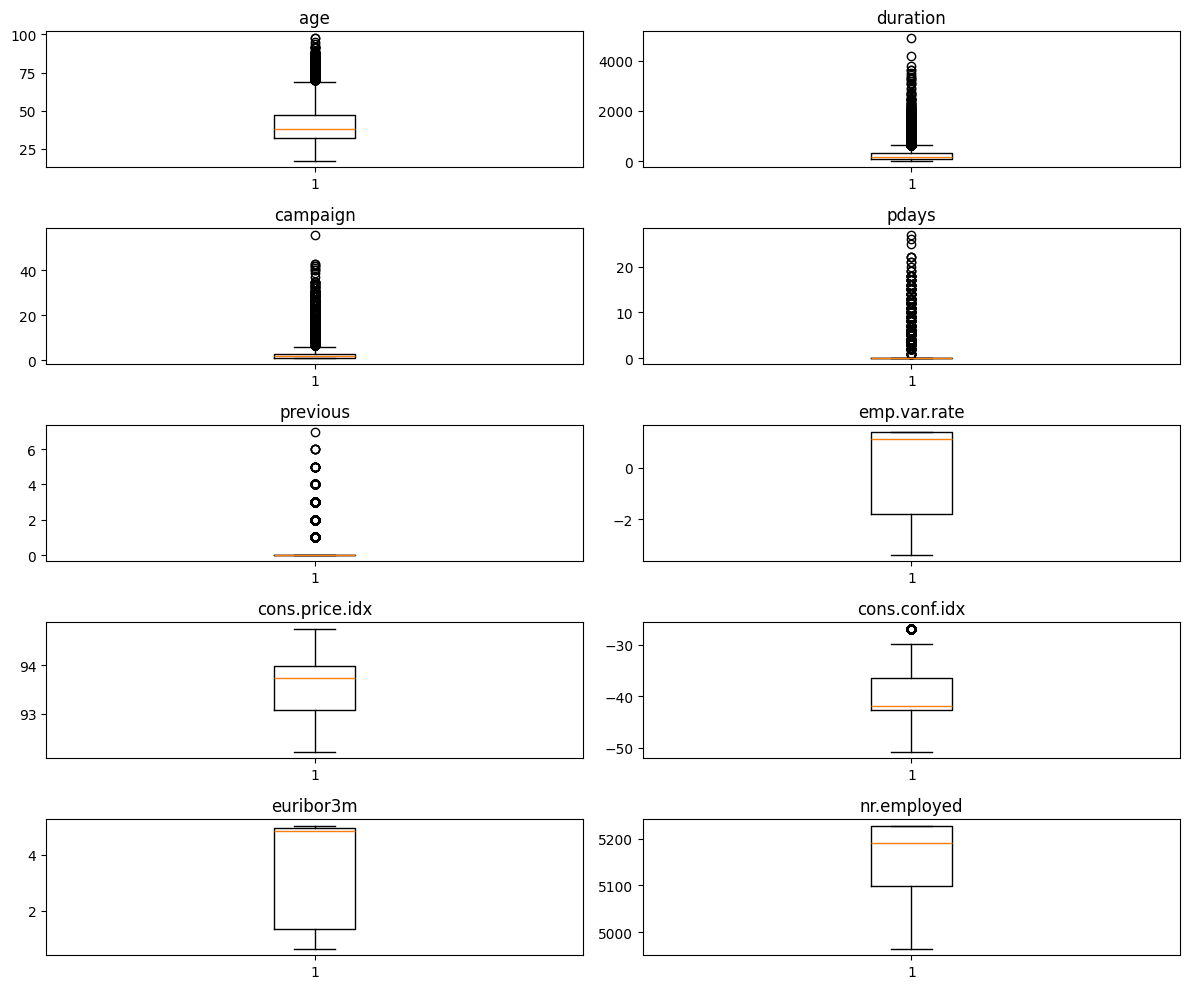

In [19]:
# Assuming df is your DataFrame and has been loaded previously
plt.figure(figsize=(12, 10))

variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for i, variable in enumerate(variables, start=1):
    plt.subplot(5, 2, i)
    plt.boxplot(df[variable])
    plt.title(variable)

plt.tight_layout()
plt.show()

### **Observation from Outlier Analysis**

We observe that among the features, only 'age', 'duration', and 'campaign' exhibit a significant number of outliers. Let's focus on addressing outliers in these specific features using the Interquartile Range (IQR) method.

In [19]:
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
    df=df.loc[filter]

## **Data Visualization**

### **Duration of Calls vs Job Status of Consumers**

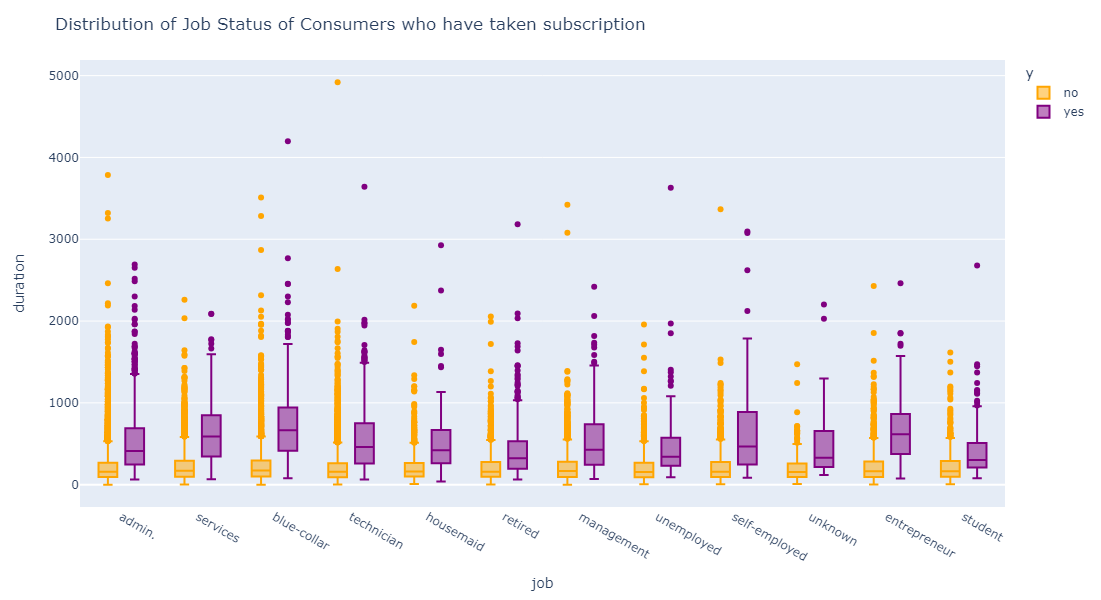

In [115]:
import plotly.express as px

fig = px.box(df, x="job", y="duration", color="y")
fig.update_traces(quartilemethod="exclusive")
fig.update_traces(marker_line_color='blue', selector=dict(type='box'))  # Set box border color
fig.update_traces(selector=dict(type='scatter', mode='markers+lines'))  # Set outliers color

# Set different colors for "yes" and "no"
fig.for_each_trace(lambda t: t.update(marker=dict(color='purple') if t.name == 'yes' else dict(color='orange')))

# Add title
fig.update_layout(title="Distribution of Job Status of Consumers who have taken subscription")

# Increase the size of the plot
fig.update_layout(height=600, width=800)

fig.show()

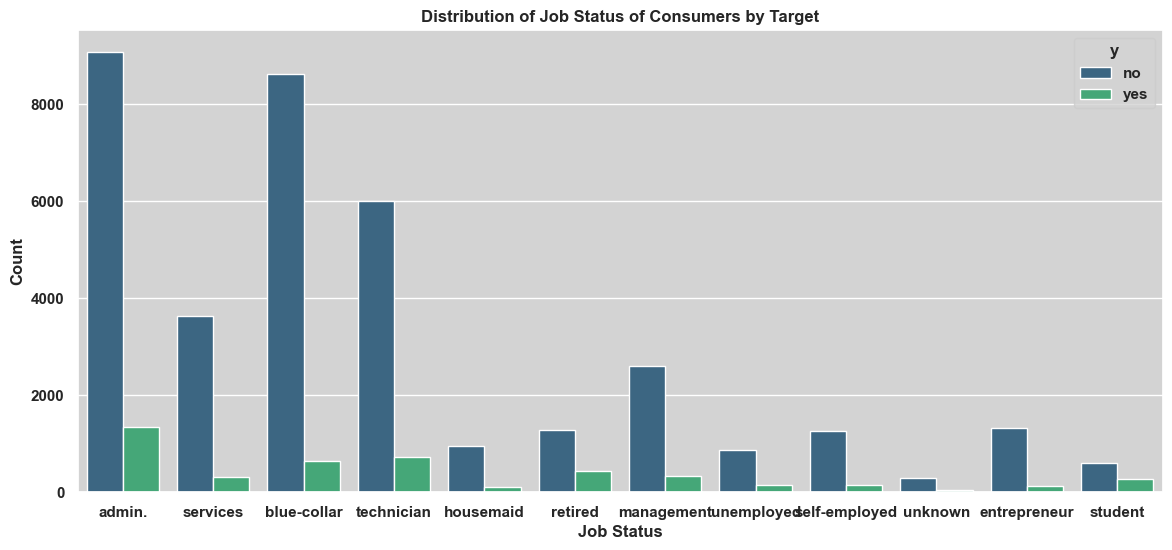

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set font properties
font = {'family': 'Arial', 'weight': 'bold', 'size': 12}
plt.rc('font', **font)

# Create a count plot
plt.figure(figsize=(14, 6))
sns.countplot(x="job", hue="y", data=df, palette="viridis")

# Set title and labels
plt.title('Distribution of Job Status of Consumers by Target', fontweight='bold')
plt.xlabel('Job Status', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

# Show the plot
plt.show()

### **Insights drawn from Visualization**

* Leads who haven't made a deposit generally have shorter call durations.
* On average, blue-collar workers and entrepreneurs tend to have longer call durations compared to students and retirees.
* A significant portion of leads originated from self-employed individuals and management professionals, indicating a large distribution within these groups.

### **Duration of Calls vs Education Status of Consumers**

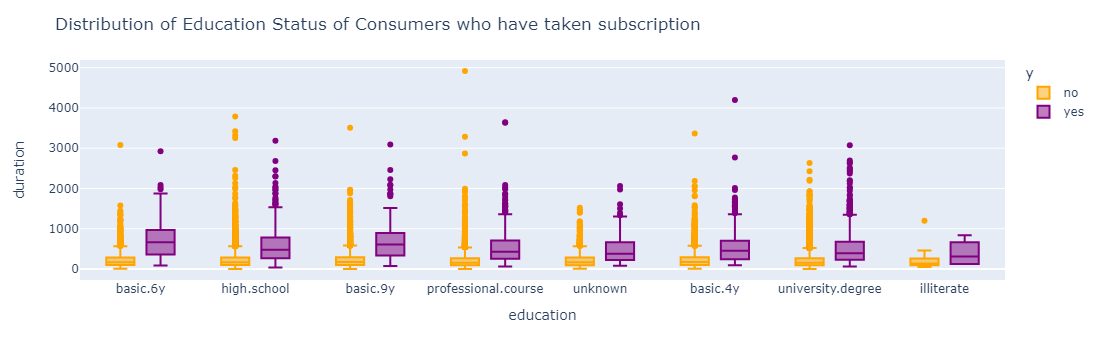

In [114]:
import plotly.express as px

fig = px.box(df, x="education", y="duration", color="y")
fig.update_traces(quartilemethod="exclusive")
fig.update_traces(marker_line_color='blue', selector=dict(type='box'))  # Set box border color
fig.update_traces(selector=dict(type='scatter', mode='markers+lines'))  # Set outliers color

# Set different colors for "yes" and "no"
fig.for_each_trace(lambda t: t.update(marker=dict(color='purple') if t.name == 'yes' else dict(color='orange')))

# Add title
fig.update_layout(title="Distribution of Education Status of Consumers who have taken subscription")

fig.show()

### **Distribution of Quarterly Indicators**

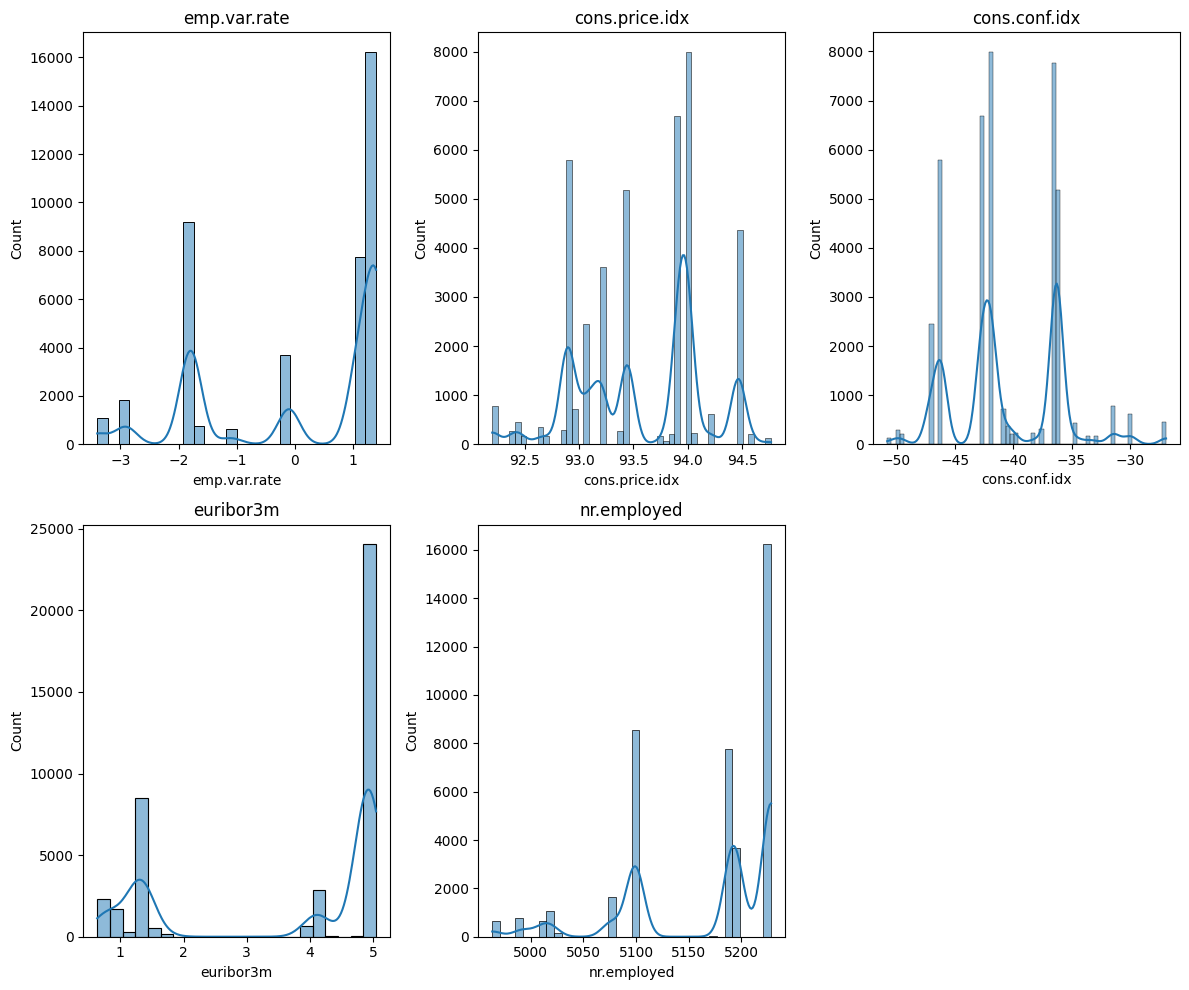

In [21]:
# Assuming df is your DataFrame and has been loaded previously
plt.figure(figsize=(12, 10))

plt.subplot(231)
sns.histplot(df['emp.var.rate'], kde=True)
plt.title('emp.var.rate')

plt.subplot(232)
sns.histplot(df['cons.price.idx'], kde=True)
plt.title('cons.price.idx')

plt.subplot(233)
sns.histplot(df['cons.conf.idx'], kde=True)
plt.title('cons.conf.idx')

plt.subplot(234)
sns.histplot(df['euribor3m'], kde=True)
plt.title('euribor3m')

plt.subplot(235)
sns.histplot(df['nr.employed'], kde=True)
plt.title('nr.employed')

# Adjust the layout
plt.tight_layout()
plt.show()

### **Insights drawn from Visualisations**

* The observed high employee turnover rate suggests that the campaign coincided with periods of economic instability, where job shifts were frequent.
* The Consumer Price Index reflects favorably, indicating that the leads had sufficient purchasing power for goods and services. This factor might have encouraged them to consider saving and prompted their interest in making a deposit.
* Conversely, the Consumer Confidence Index indicates a notable lack of confidence in the fluctuating economy among the leads.
* The 3-month Euribor interest rate, representing the rate at which European banks lend funds to each other in euros with a 3-month maturity, was notably high during our analysis period.
* Additionally, the peak in the number of employees suggests a potential increase in their income, potentially driving the campaign's focus on targeting employed leads for deposit-making.

### **Distribution of Target Variable**

In [22]:
df['y'].value_counts(normalize=True)

y
no    0.887
yes   0.113
Name: proportion, dtype: float64

The distribution of the target variable is heavily skewed, with approximately 92% of the responses categorized as "no" (0) and only 8% categorized as "yes" (1). This indicates a significant class imbalance, where the majority of instances belong to the "no" category, while the "yes" category is relatively underrepresented. Such imbalance may pose challenges in model training and evaluation, requiring appropriate techniques to handle it effectively.

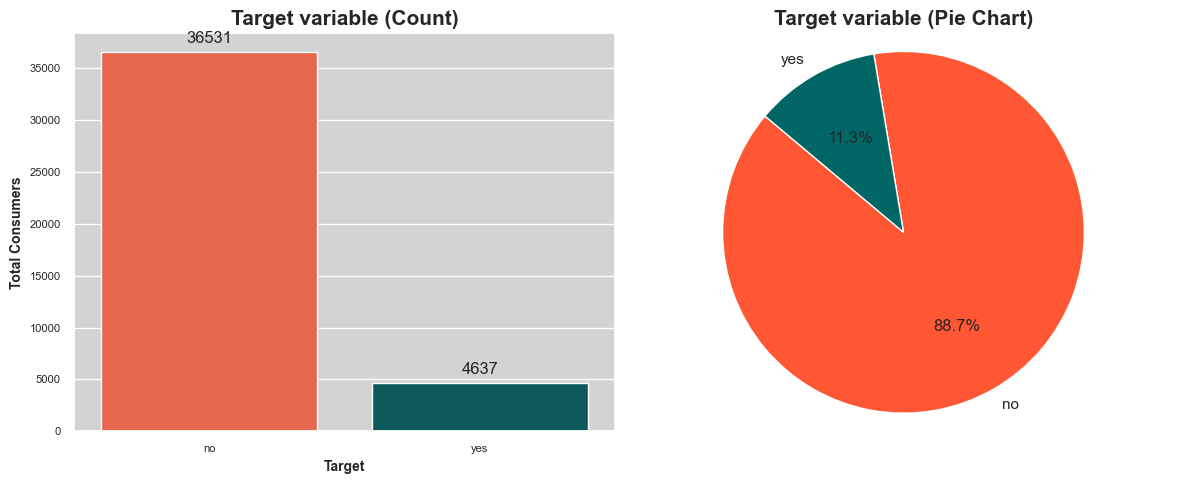

In [23]:
# Define custom colors
palette_features = ['#FF5733', '#006666']  # Example colors

# Set background color of all plots
sns.set(rc={'axes.facecolor': 'lightgray'})

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Countplot (on the left)
sns.countplot(data=df, x='y', hue='y', palette=palette_features, ax=ax1, legend=False)

# Add markers to the bars
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# Customize the appearance of the countplot
ax1.set_title('Target variable (Count)', fontsize=15, fontweight='bold', fontname='Arial', ha='center')
ax1.set_xlabel('Target', fontsize=10, fontweight='bold', fontname='Arial')
ax1.set_ylabel('Total Consumers', fontsize=10, fontweight='bold', fontname='Arial')
ax1.tick_params(axis='both', labelsize=8)

# Pie chart (on the right)
target_counts = df['y'].value_counts()
labels = target_counts.index
sizes = target_counts.values

ax2.pie(sizes, labels=labels, autopct='%1.1f%%', colors=palette_features, startangle=140)
ax2.set_title('Target variable (Pie Chart)', fontsize=15, fontweight='bold', fontname='Arial', ha='center')

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  

# Show the plot
plt.tight_layout()
plt.show()

### **Distribution of Age among Consumers who took Subscription**

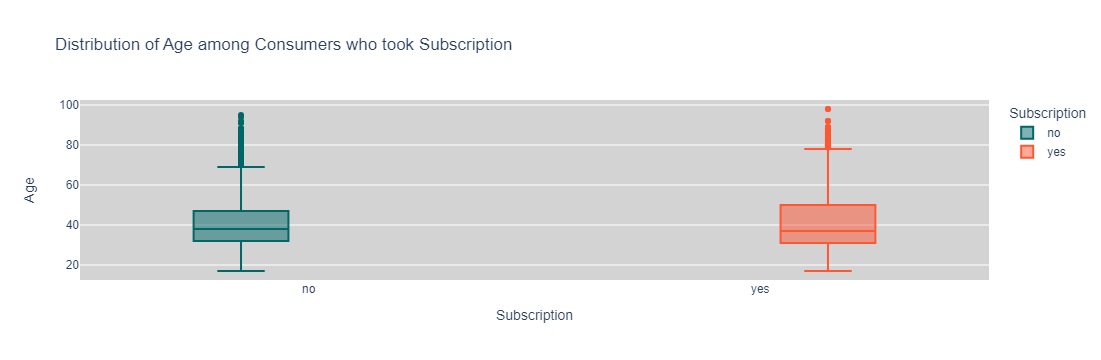

In [24]:
# Define custom colors for "yes" and "no" categories
color_map = {'yes': '#FF5733', 'no': '#006666'}

fig = px.box(df, x="y", y="age", color="y", title='Distribution of Age among Consumers who took Subscription', color_discrete_map=color_map)

# Update layout to adjust plot area and colors
fig.update_layout(
    xaxis={'title': 'Subscription', 'tickfont': {'size': 12}},
    yaxis={'title': 'Age', 'tickfont': {'size': 12}},
    legend={'title': 'Subscription', 'font': {'size': 12}},
    font=dict(family="Arial, sans-serif", size=12),
    plot_bgcolor='lightgray',  # Background color of plot area
    paper_bgcolor='white',  # Background color of entire figure
    boxmode='group',  # Set box mode to group
    boxgap=0.4,  # Set gap between boxes
)

fig.show()

### **Observation from Visualisation**

There is a slight age difference observed, but it is not statistically significant. The median age remains almost consistent, with clients in the group who signed up for term deposits being slightly older.

### **Consumers contacted during months for Subscription**

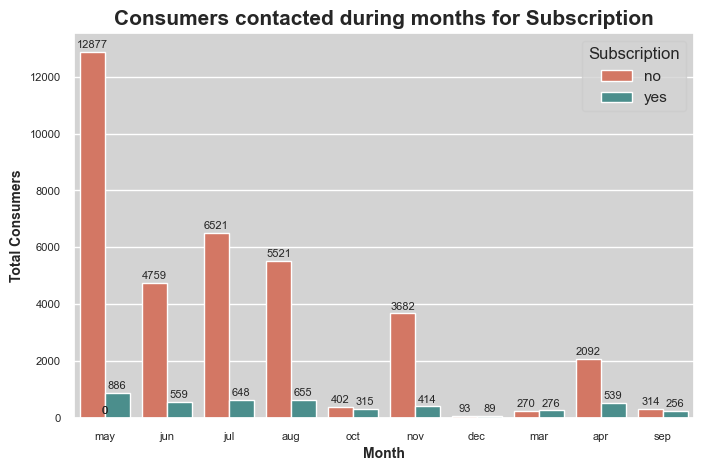

In [25]:
# Define custom colors
palette_features = ['#E56B51', '#409996']  # Example colors

# Set background color of all plots
sns.set(rc={'axes.facecolor': 'lightgray'})

plt.figure(figsize=(8, 5))  # Reduced plot size
plt.title('Consumers contacted during months for Subscription', fontsize=15, fontweight='bold', fontname='Arial', ha='center')

ax = sns.countplot(data=df, x='month', hue='y', palette=palette_features)

# Add markers to the bars with reduced font size
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 5), 
                 textcoords='offset points',
                 fontsize=8)  # Adjust font size here

# Customize the appearance of the countplot
ax.set_xlabel('Month', fontsize=10, fontweight='bold', fontname='Arial')
ax.set_ylabel('Total Consumers', fontsize=10, fontweight='bold', fontname='Arial')

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=8)

# Update legend title
ax.legend(title='Subscription')

# Show the plot
plt.show()

### **Observation from Visualization**

The graph illustrates that the most active campaigns occurred from May to August, with one notable campaign in November. Notably, there is a lower count in December, March, and September. However, it's interesting to observe that the distribution between "yes" and "no" responses is nearly equal during these months. This suggests the possibility of campaigns with fewer contacts but more effective targeting strategies.

### **Means of Communication used to reach Consumers for Subscription**

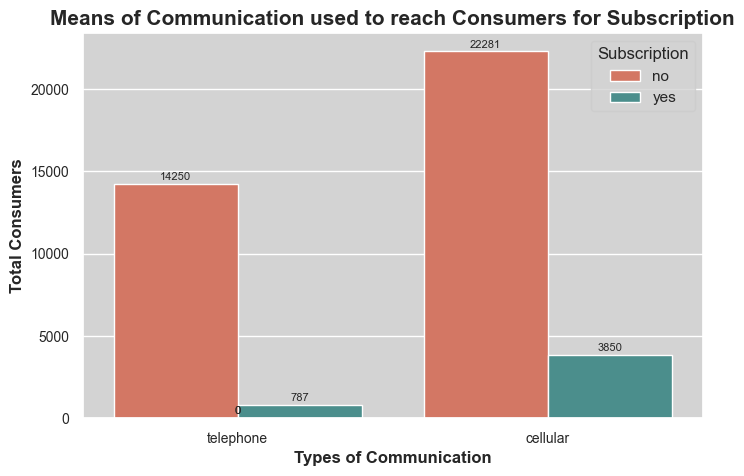

In [26]:
# Set background color of all plots
sns.set(rc={'axes.facecolor': 'lightgray'})

plt.figure(figsize=(8, 5))  # Reduced plot size
plt.title('Means of Communication used to reach Consumers for Subscription', fontsize=15, fontweight='bold', fontname='Arial', ha='center')

ax = sns.countplot(data=df, x='contact', hue='y', palette=palette_features)

# Add markers to the bars with reduced font size
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 5), 
                 textcoords='offset points',
                 fontsize=8)  # Adjust font size here

# Customize the appearance of the countplot
ax.set_xlabel('Types of Communication', fontsize=12, fontweight='bold', fontname='Arial')
ax.set_ylabel('Total Consumers', fontsize=12, fontweight='bold', fontname='Arial')

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=10)

# Update legend title
ax.legend(title='Subscription')

# Show the plot
plt.show()

### **Observation from Dataset**

Cellular communication witnessed a higher volume of contacts, and a greater number of successful deposits originated from this channel. However, it's essential to delve into the proportion of successful deposits across different contact types.

In [27]:
df.groupby('contact')['y'].value_counts(normalize=True)

contact    y  
cellular   no    0.853
           yes   0.147
telephone  no    0.948
           yes   0.052
Name: proportion, dtype: float64

Out of the total contacts made, 11% resulted in deposits through cellular communication, whereas only 2% were successful via telephone. However, without knowing the cost per contact, it's challenging to determine which contact type is more effective.

In [28]:
df[['y','contact']].loc[df['y']=='yes'].value_counts(normalize=True)

y    contact  
yes  cellular    0.830
     telephone   0.170
Name: proportion, dtype: float64

In total, 87.7% of term deposit customers were reached via phone while 12.3% were reached by telephone.

### **Marital Status of Consumers who took subscription**

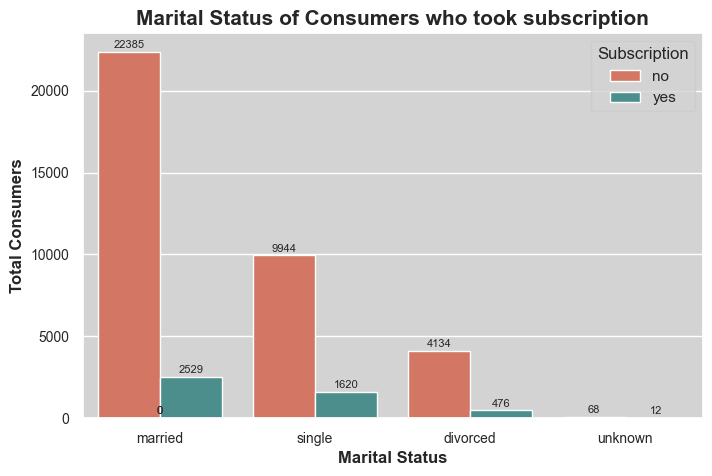

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors
palette_features = ['#E56B51', '#409996']

# Set background color of all plots
sns.set(rc={'axes.facecolor': 'lightgray'})

plt.figure(figsize=(8, 5))  # Reduced plot size
plt.title('Marital Status of Consumers who took subscription', fontsize=15, fontweight='bold', fontname='Arial', ha='center')

ax = sns.countplot(data=df, x='marital', hue='y', palette=palette_features)

# Add markers to the bars with reduced font size
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 5), 
                 textcoords='offset points',
                 fontsize=8)  # Adjust font size here

# Customize the appearance of the countplot
ax.set_xlabel('Marital Status', fontsize=12, fontweight='bold', fontname='Arial')
ax.set_ylabel('Total Consumers', fontsize=12, fontweight='bold', fontname='Arial')

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=10)

# Update legend title
ax.legend(title='Subscription')

# Show the plot
plt.show()

Based on this data, it appears that the majority of contacts were made for married clients. However, without knowledge of the distribution of clients across marital statuses, it's uncertain whether this distribution was intentional or a result of the marketing campaign's design.

In [30]:
df.groupby('marital')['y'].value_counts(normalize=True)

marital   y  
divorced  no    0.897
          yes   0.103
married   no    0.898
          yes   0.102
single    no    0.860
          yes   0.140
unknown   no    0.850
          yes   0.150
Name: proportion, dtype: float64

### **Observation from Visualization & Statistics**

The conversion rate for deposits stands at 6% for both divorced and married individuals, whereas it reaches 11% for singles. This insight is significant, suggesting that future efforts should prioritize targeting this category for increased effectiveness.

### **Education status of Consumers who took Subscription**

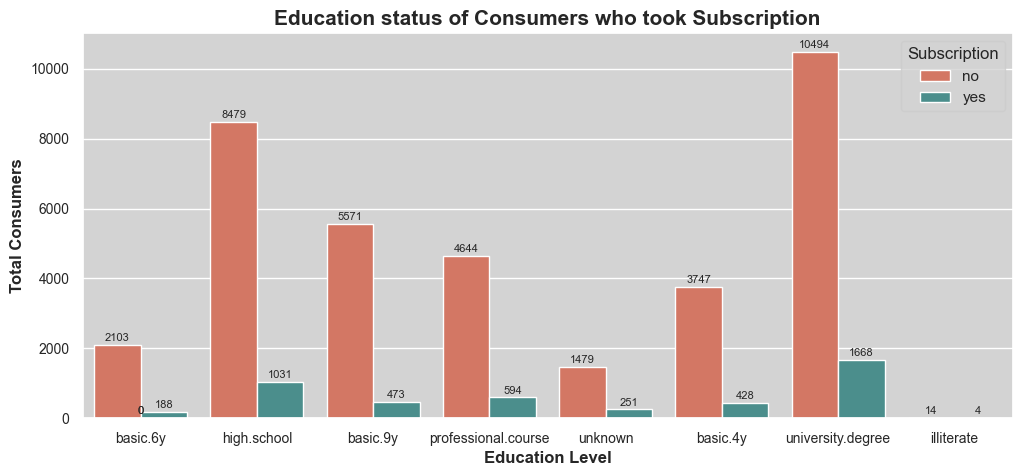

In [31]:
# Define custom colors
palette_features = ['#E56B51', '#409996']  # Example colors

# Set background color of all plots
sns.set(rc={'axes.facecolor': 'lightgray'})

plt.figure(figsize=(12, 5))  # Reduced plot size
plt.title('Education status of Consumers who took Subscription', fontsize=15, fontweight='bold', fontname='Arial', ha='center')

ax = sns.countplot(data=df, x='education', hue='y', palette=palette_features)

# Add markers to the bars with reduced font size
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 5), 
                 textcoords='offset points',
                 fontsize=8)  # Adjust font size here

# Customize the appearance of the countplot
ax.set_xlabel('Education Level', fontsize=12, fontweight='bold', fontname='Arial')
ax.set_ylabel('Total Consumers', fontsize=12, fontweight='bold', fontname='Arial')

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=10)

# Update legend title
ax.legend(title='Subscription')

# Show the plot
plt.show()

In [32]:
df.groupby('education')['y'].value_counts(normalize=True)

education            y  
basic.4y             no    0.897
                     yes   0.103
basic.6y             no    0.918
                     yes   0.082
basic.9y             no    0.922
                     yes   0.078
high.school          no    0.892
                     yes   0.108
illiterate           no    0.778
                     yes   0.222
professional.course  no    0.887
                     yes   0.113
university.degree    no    0.863
                     yes   0.137
unknown              no    0.855
                     yes   0.145
Name: proportion, dtype: float64

### **Observation from Visualisation & Statistics**

Similar to marital status, certain education categories exhibit higher rates of positive contacts in this analysis, such as "illiterate" (14.3%) and "university" (11.1%). Hence, it may be advantageous in future campaigns to allocate more focus on these categories, given their better conversion rates.

### **Subscription Status based on previous marketing campaign**

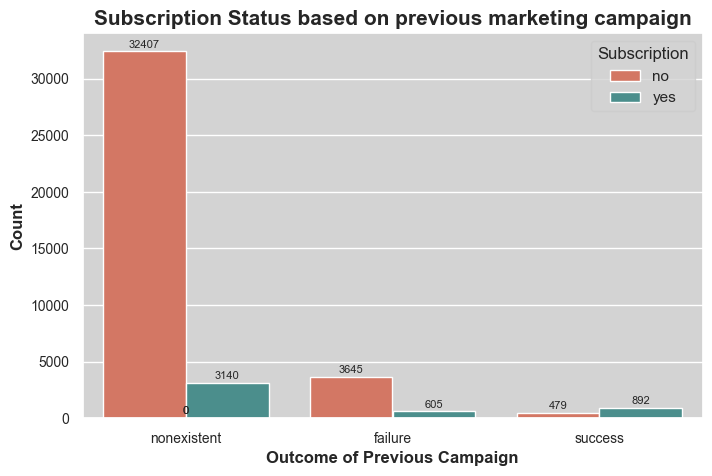

In [33]:
# Define custom colors
palette_features = ['#E56B51', '#409996']  # Example colors

# Set background color of all plots
sns.set(rc={'axes.facecolor': 'lightgray'})

plt.figure(figsize=(8, 5))  # Reduced plot size
plt.title('Subscription Status based on previous marketing campaign', fontsize=15, fontweight='bold', fontname='Arial', ha='center')

ax = sns.countplot(data=df, x='poutcome', hue='y', palette=palette_features)

# Add markers to the bars with reduced font size
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 5), 
                 textcoords='offset points',
                 fontsize=8)  # Adjust font size here

# Customize the appearance of the countplot
ax.set_xlabel('Outcome of Previous Campaign', fontsize=12, fontweight='bold', fontname='Arial')
ax.set_ylabel('Count', fontsize=12, fontweight='bold', fontname='Arial')

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=10)

# Update legend title
ax.legend(title='Subscription')

# Show the plot
plt.show()

### **Observation from Visualisation**

This graph highlights a stark contrast in conversion rates between successful and unsuccessful campaigns. The conversion rate from successful campaigns is notably high, whereas the rate from unsuccessful campaigns is remarkably low. Consequently, it's crucial to conduct a detailed analysis of social, demographic, and other relevant details regarding successful contacts to facilitate more precise targeting in future campaigns.

### **Loan Status of Customers (Housing Loan, Personal Loan, Credit Default)**

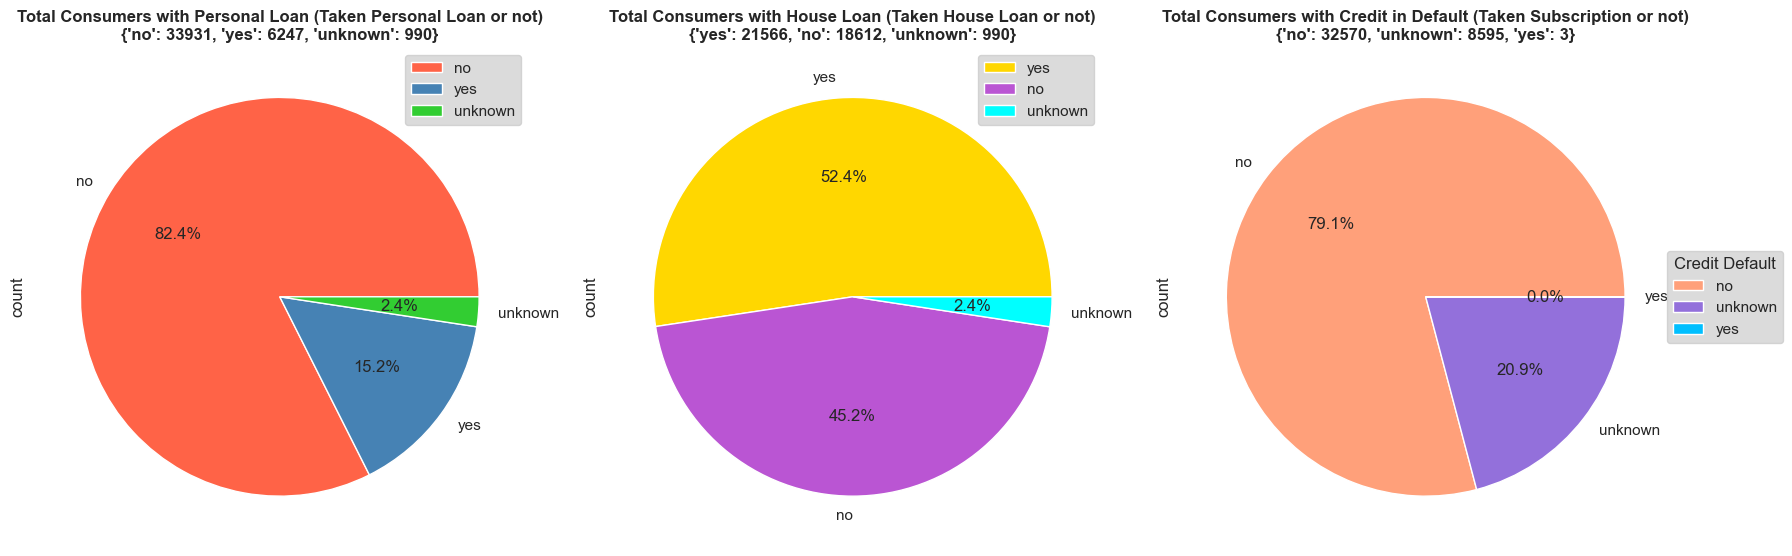

In [34]:
import matplotlib.pyplot as plt

# Set custom colors for pie charts
loan_colors = ['#FF6347', '#4682B4', '#32CD32']  # Red, Blue, Green
housing_colors = ['#FFD700', '#BA55D3', '#00FFFF']  # Gold, Purple, Cyan
default_colors = ['#FFA07A', '#9370DB', '#00BFFF']  # Light Salmon, Medium Purple, Deep Sky Blue

# Create subplots for multiple pie charts
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Calculate value counts
loan_counts = df['loan'].value_counts()
housing_counts = df['housing'].value_counts()
default_counts = df['default'].value_counts()

# Pie chart for loan
loan_counts.plot.pie(
    autopct='%1.1f%%', colors=loan_colors, ax=axs[0], legend=True
)
axs[0].set_title(
    f'Total Consumers with Personal Loan (Taken Personal Loan or not)\n{loan_counts.to_dict()}',
    fontsize=12, fontweight='bold', fontname='Arial', ha='center'
)

# Pie chart for housing
housing_counts.plot.pie(
    autopct='%1.1f%%', colors=housing_colors, ax=axs[1], legend=True
)
axs[1].set_title(
    f'Total Consumers with House Loan (Taken House Loan or not)\n{housing_counts.to_dict()}',
    fontsize=12, fontweight='bold', fontname='Arial', ha='center'
)

# Pie chart for default
default_counts.plot.pie(
    autopct='%1.1f%%', colors=default_colors, ax=axs[2], legend=True
)
axs[2].set_title(
    f'Total Consumers with Credit in Default (Taken Subscription or not)\n{default_counts.to_dict()}',
    fontsize=12, fontweight='bold', fontname='Arial', ha='center'
)

# Add legend for default
plt.legend(default_counts.index, title='Credit Default', loc='center', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()

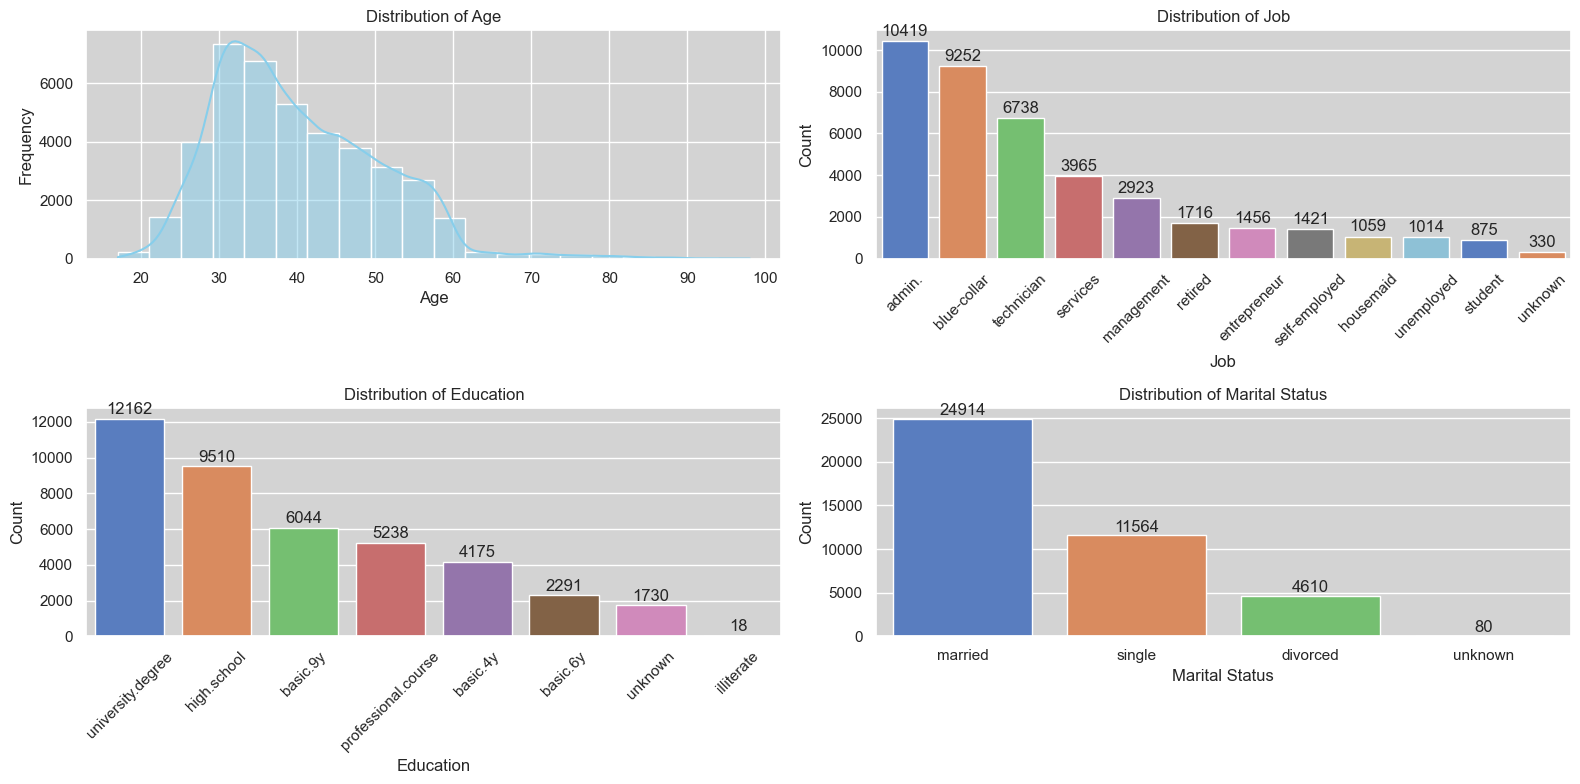

In [35]:
# Set the figure size
plt.figure(figsize=(16, 8))

# Create the histogram for age
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='age', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Create the bar plot for job
plt.subplot(2, 2, 2)
job_counts = df['job'].value_counts()
sns.barplot(x=job_counts.index, y=job_counts, hue=job_counts.index, palette='muted', legend=False)
plt.title('Distribution of Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add markers to the job bar plot
for i, count in enumerate(job_counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

# Create the bar plot for education
plt.subplot(2, 2, 3)
edu_counts = df['education'].value_counts()
sns.barplot(x=edu_counts.index, y=edu_counts, hue=edu_counts.index, palette='muted', legend=False)
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add markers to the education bar plot
for i, count in enumerate(edu_counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

# Create the bar plot for marital
plt.subplot(2, 2, 4)
marital_counts = df['marital'].value_counts()
sns.barplot(x=marital_counts.index, y=marital_counts, hue=marital_counts.index, palette='muted', legend=False)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Add markers to the marital bar plot
for i, count in enumerate(marital_counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### **Correlation Analysis**

Exploring correlation as part of Exploratory Data Analysis (EDA) involves examining relationships between variables, including the target variable, especially after encoding it since it's categorical. Notably, the most significant correlations with the target include:

* Contact duration
* Outcome of the previous contact
* Euribor3m (indicating average interbank interest rates in the Eurozone; higher rates may encourage spending on financial products)
* Emp.var.rate (representing employment variation rate, a macroeconomic indicator)
* Nr.employed (number of bank employees)

These factors play key roles in understanding the relationship between various features and the target variable.

In [36]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'y' variable
df['y_encoded'] = label_encoder.fit_transform(df['y'])

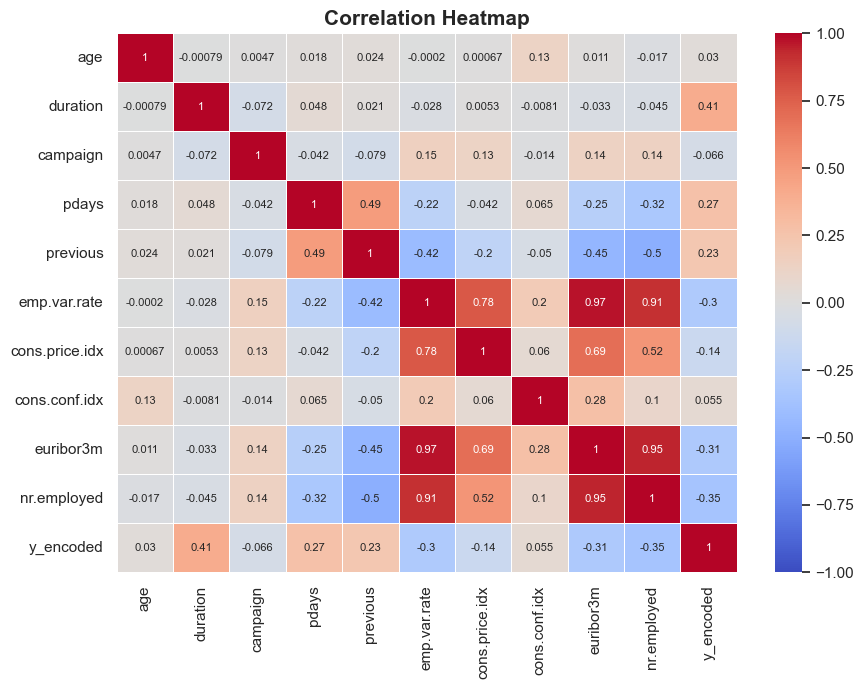

In [37]:
numbers = df.select_dtypes(['int64', 'float64','int32']).columns.tolist()

# Create heatmap with reduced plot size, title, changed color, and reduced font size
plt.figure(figsize=(10, 7))
plt.title('Correlation Heatmap', fontsize=15, fontweight='bold', fontname='Arial', ha='center')
sns.heatmap(df[numbers].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, annot_kws={"size": 8}, linewidths=.5)
plt.show()

## **Part-2 (Statsitical Models)**

We aim to develop data science models that provide valuable insights into two critical business questions: identifying the customer segments most responsive to marketing campaigns and formulating effective business strategies. To achieve this, we will:

- Develop statistical learning models to predict the success of a marketing campaign for individual customers.
- Extract at least three insights to assist the company in making informed decisions about their marketing campaigns.

In [39]:
df_cleaned

age          job  marital            education  default housing loan  \
0       40       admin.  married             basic.6y       no      no   no   
1       56     services  married          high.school       no      no  yes   
2       45     services  married             basic.9y  unknown      no   no   
3       59       admin.  married  professional.course       no      no   no   
4       41  blue-collar  married              unknown  unknown      no   no   
...    ...          ...      ...                  ...      ...     ...  ...   
41175   29   unemployed   single             basic.4y       no     yes   no   
41176   73      retired  married  professional.course       no     yes   no   
41177   46  blue-collar  married  professional.course       no      no   no   
41178   56      retired  married    university.degree       no     yes   no   
41179   44   technician  married  professional.course       no      no   no   

         contact month day_of_week  ...  pdays  previous     poutcome  \
0      telephone   may         mon  ...      0         0  nonexistent   
1      telephone   may         mon  ...      0         0  nonexistent   
2      telephone   may         mon  ...      0         0  nonexistent   
3      telephone   may         mon  ...      0         0  nonexistent   
4      telephone   may         mon  ...      0         0  nonexistent   
...          ...   ...         ...  ...    ...       ...          ...   
41175   cellular   nov         fri  ...      9         1      success   
41176   cellular   nov         fri  ...      0         0  nonexistent   
41177   cellular   nov         fri  ...      0         0  nonexistent   
41178   cellular   nov         fri  ...      0         0  nonexistent   
41179   cellular   nov         fri  ...      0         0  nonexistent   

       emp.var.rate cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0             1.100         93.994        -36.400      4.857     5191.000   
1             1.100         93.994        -36.400      4.857     5191.000   
2             1.100         93.994        -36.400      4.857     5191.000   
3             1.100         93.994        -36.400      4.857     5191.000   
4             1.100         93.994        -36.400      4.857     5191.000   
...             ...            ...            ...        ...          ...   
41175        -1.100         94.767        -50.800      1.028     4963.600   
41176        -1.100         94.767        -50.800      1.028     4963.600   
41177        -1.100         94.767        -50.800      1.028     4963.600   
41178        -1.100         94.767        -50.800      1.028     4963.600   
41179        -1.100         94.767        -50.800      1.028     4963.600   

         y  y_encoded  
0       no          0  
1       no          0  
2       no          0  
3       no          0  
4       no          0  
...    ...        ...  
41175   no          0  
41176  yes          1  
41177   no          0  
41178   no          0  
41179  yes          1  

[41168 rows x 22 columns]

In [40]:
# Drop the original 'y' column
df_cleaned = df_cleaned.drop(columns=['y'])

In [41]:
# Rename the column 'y_encoded' to 'y'
df_cleaned = df_cleaned.rename(columns={'y_encoded': 'y'})

In [42]:
category_counts = {}
columns_of_interest = ['housing', 'loan', 'default']

for column in columns_of_interest:
    category_counts[column] = df_cleaned[column].value_counts()

print(category_counts)

{'housing': housing
yes        21566
no         18612
unknown      990
Name: count, dtype: int64, 'loan': loan
no         33931
yes         6247
unknown      990
Name: count, dtype: int64, 'default': default
no         32570
unknown     8595
yes            3
Name: count, dtype: int64}


In [43]:
# Drop rows where both 'housing' and 'loan' are 'unknown'
df_cleaned = df_cleaned[~((df_cleaned['housing'] == 'unknown') & (df_cleaned['loan'] == 'unknown'))]

# Drop rows where 'marital_status', 'education', and 'job' are 'unknown'
df_cleaned = df_cleaned[~((df_cleaned['marital'] == 'unknown') & 
                          (df_cleaned['education'] == 'unknown') & 
                          (df_cleaned['job'] == 'unknown'))]

# Display the first few rows of the cleaned dataframe
df_cleaned

age          job  marital            education  default housing loan  \
0       40       admin.  married             basic.6y       no      no   no   
1       56     services  married          high.school       no      no  yes   
2       45     services  married             basic.9y  unknown      no   no   
3       59       admin.  married  professional.course       no      no   no   
4       41  blue-collar  married              unknown  unknown      no   no   
...    ...          ...      ...                  ...      ...     ...  ...   
41175   29   unemployed   single             basic.4y       no     yes   no   
41176   73      retired  married  professional.course       no     yes   no   
41177   46  blue-collar  married  professional.course       no      no   no   
41178   56      retired  married    university.degree       no     yes   no   
41179   44   technician  married  professional.course       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1      0         0   
1      telephone   may         mon  ...         1      0         0   
2      telephone   may         mon  ...         1      0         0   
3      telephone   may         mon  ...         1      0         0   
4      telephone   may         mon  ...         1      0         0   
...          ...   ...         ...  ...       ...    ...       ...   
41175   cellular   nov         fri  ...         1      9         1   
41176   cellular   nov         fri  ...         1      0         0   
41177   cellular   nov         fri  ...         1      0         0   
41178   cellular   nov         fri  ...         2      0         0   
41179   cellular   nov         fri  ...         1      0         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent        1.100          93.994        -36.400      4.857   
1      nonexistent        1.100          93.994        -36.400      4.857   
2      nonexistent        1.100          93.994        -36.400      4.857   
3      nonexistent        1.100          93.994        -36.400      4.857   
4      nonexistent        1.100          93.994        -36.400      4.857   
...            ...          ...             ...            ...        ...   
41175      success       -1.100          94.767        -50.800      1.028   
41176  nonexistent       -1.100          94.767        -50.800      1.028   
41177  nonexistent       -1.100          94.767        -50.800      1.028   
41178  nonexistent       -1.100          94.767        -50.800      1.028   
41179  nonexistent       -1.100          94.767        -50.800      1.028   

       nr.employed  y  
0         5191.000  0  
1         5191.000  0  
2         5191.000  0  
3         5191.000  0  
4         5191.000  0  
...            ... ..  
41175     4963.600  0  
41176     4963.600  1  
41177     4963.600  0  
41178     4963.600  0  
41179     4963.600  1  

[40173 rows x 21 columns]

In [44]:
category_counts = {}
columns_of_interest = ['housing', 'loan']

for column in columns_of_interest:
    category_counts[column] = df_cleaned[column].value_counts()

print(category_counts)

{'housing': housing
yes    21561
no     18612
Name: count, dtype: int64, 'loan': loan
no     33928
yes     6245
Name: count, dtype: int64}


In [45]:
# Removing irrelevant columns from the dataset

def drop_columns(df_cleaned, columns_to_drop):
    df_cleaned.drop(columns_to_drop, axis=1, inplace=True)
    return df_cleaned

columns_to_drop = ['default']

df_cleaned = drop_columns(df_cleaned, columns_to_drop)

In [46]:
def get_column_lists(df_cleaned):
    # List of categorical columns for one-hot encoding
    categorical_columns = [col for col in df_cleaned.columns if df_cleaned.dtypes[col] == 'object']

    # List of numerical columns to standardized data
    numerical_columns = [col for col in df_cleaned.columns if df_cleaned.dtypes[col] != 'object']

    return numerical_columns, categorical_columns

# Call the function with your DataFrame
numerical_cols, categorical_cols = get_column_lists(df_cleaned)

print('Numerical Features are:', numerical_cols)
print('Categorical Features are:', categorical_cols)

Numerical Features are: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
Categorical Features are: ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [47]:
category_counts = {}
columns_of_interest = ['poutcome']

for column in columns_of_interest:
    category_counts[column] = df_cleaned[column].value_counts()

print(category_counts)

{'poutcome': poutcome
nonexistent    34691
failure         4139
success         1343
Name: count, dtype: int64}


In [122]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40173 entries, 0 to 41179
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40173 non-null  int64  
 1   job             40173 non-null  object 
 2   marital         40173 non-null  object 
 3   education       40173 non-null  object 
 4   housing         40173 non-null  object 
 5   loan            40173 non-null  object 
 6   contact         40173 non-null  object 
 7   month           40173 non-null  object 
 8   day_of_week     40173 non-null  object 
 9   duration        40173 non-null  int64  
 10  campaign        40173 non-null  int64  
 11  pdays           40173 non-null  int64  
 12  previous        40173 non-null  int64  
 13  poutcome        40173 non-null  object 
 14  emp.var.rate    40173 non-null  float64
 15  cons.price.idx  40173 non-null  float64
 16  cons.conf.idx   40173 non-null  float64
 17  euribor3m       40173 non-null  floa

In [48]:
df_cleaned

age          job  marital            education housing loan    contact  \
0       40       admin.  married             basic.6y      no   no  telephone   
1       56     services  married          high.school      no  yes  telephone   
2       45     services  married             basic.9y      no   no  telephone   
3       59       admin.  married  professional.course      no   no  telephone   
4       41  blue-collar  married              unknown      no   no  telephone   
...    ...          ...      ...                  ...     ...  ...        ...   
41175   29   unemployed   single             basic.4y     yes   no   cellular   
41176   73      retired  married  professional.course     yes   no   cellular   
41177   46  blue-collar  married  professional.course      no   no   cellular   
41178   56      retired  married    university.degree     yes   no   cellular   
41179   44   technician  married  professional.course      no   no   cellular   

      month day_of_week  duration  campaign  pdays  previous     poutcome  \
0       may         mon       151         1      0         0  nonexistent   
1       may         mon       307         1      0         0  nonexistent   
2       may         mon       198         1      0         0  nonexistent   
3       may         mon       139         1      0         0  nonexistent   
4       may         mon       217         1      0         0  nonexistent   
...     ...         ...       ...       ...    ...       ...          ...   
41175   nov         fri       112         1      9         1      success   
41176   nov         fri       334         1      0         0  nonexistent   
41177   nov         fri       383         1      0         0  nonexistent   
41178   nov         fri       189         2      0         0  nonexistent   
41179   nov         fri       442         1      0         0  nonexistent   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0             1.100          93.994        -36.400      4.857     5191.000  0  
1             1.100          93.994        -36.400      4.857     5191.000  0  
2             1.100          93.994        -36.400      4.857     5191.000  0  
3             1.100          93.994        -36.400      4.857     5191.000  0  
4             1.100          93.994        -36.400      4.857     5191.000  0  
...             ...             ...            ...        ...          ... ..  
41175        -1.100          94.767        -50.800      1.028     4963.600  0  
41176        -1.100          94.767        -50.800      1.028     4963.600  1  
41177        -1.100          94.767        -50.800      1.028     4963.600  0  
41178        -1.100          94.767        -50.800      1.028     4963.600  0  
41179        -1.100          94.767        -50.800      1.028     4963.600  1  

[40173 rows x 20 columns]

In [49]:
# Step 1: Define categorical columns
cat_cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Step 2: Perform one-hot encoding with prefixes for better column names
df_encoded = pd.get_dummies(df_cleaned[cat_cols], prefix=cat_cols, prefix_sep='_', dtype=np.uint8)

df_encoded.head()

job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           1                0                 0              0   
1           0                0                 0              0   
2           0                0                 0              0   
3           1                0                 0              0   
4           0                1                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             1            0   
2               0            0                  0             1            0   
3               0            0                  0             0            0   
4               0            0                  0             0            0   

   job_technician  ...  month_oct  month_sep  day_of_week_fri  \
0               0  ...          0          0                0   
1               0  ...          0          0                0   
2               0  ...          0          0                0   
3               0  ...          0          0                0   
4               0  ...          0          0                0   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0                1                0                0                0   
1                1                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   poutcome_failure  poutcome_nonexistent  poutcome_success  
0                 0                     1                 0  
1                 0                     1                 0  
2                 0                     1                 0  
3                 0                     1                 0  
4                 0                     1                 0  

[5 rows x 48 columns]

In [50]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()

to_be_scaled = df_cleaned[features_to_scale]
scaled = scaler.fit_transform(to_be_scaled)
scaled = pd.DataFrame(scaled,columns=to_be_scaled.columns,index=to_be_scaled.index)
scaled.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0 -0.002    -0.414    -0.567 -0.164    -0.350         0.649           0.726   
1  1.533     0.187    -0.567 -0.164    -0.350         0.649           0.726   
2  0.478    -0.233    -0.567 -0.164    -0.350         0.649           0.726   
3  1.821    -0.461    -0.567 -0.164    -0.350         0.649           0.726   
4  0.094    -0.160    -0.567 -0.164    -0.350         0.649           0.726   

   cons.conf.idx  euribor3m  nr.employed  
0          0.887      0.713        0.332  
1          0.887      0.713        0.332  
2          0.887      0.713        0.332  
3          0.887      0.713        0.332  
4          0.887      0.713        0.332

In [51]:
df_final = pd.concat([scaled, df_encoded],axis=1)
df_final

age  duration  campaign  pdays  previous  emp.var.rate  \
0     -0.002    -0.414    -0.567 -0.164    -0.350         0.649   
1      1.533     0.187    -0.567 -0.164    -0.350         0.649   
2      0.478    -0.233    -0.567 -0.164    -0.350         0.649   
3      1.821    -0.461    -0.567 -0.164    -0.350         0.649   
4      0.094    -0.160    -0.567 -0.164    -0.350         0.649   
...      ...       ...       ...    ...       ...           ...   
41175 -1.058    -0.565    -0.567  6.493     1.679        -0.752   
41176  3.165     0.291    -0.567 -0.164    -0.350        -0.752   
41177  0.574     0.480    -0.567 -0.164    -0.350        -0.752   
41178  1.533    -0.268    -0.205 -0.164    -0.350        -0.752   
41179  0.382     0.707    -0.567 -0.164    -0.350        -0.752   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_oct  \
0               0.726          0.887      0.713        0.332  ...          0   
1               0.726          0.887      0.713        0.332  ...          0   
2               0.726          0.887      0.713        0.332  ...          0   
3               0.726          0.887      0.713        0.332  ...          0   
4               0.726          0.887      0.713        0.332  ...          0   
...               ...            ...        ...          ...  ...        ...   
41175           2.064         -2.224     -1.495       -2.818  ...          0   
41176           2.064         -2.224     -1.495       -2.818  ...          0   
41177           2.064         -2.224     -1.495       -2.818  ...          0   
41178           2.064         -2.224     -1.495       -2.818  ...          0   
41179           2.064         -2.224     -1.495       -2.818  ...          0   

       month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0              0                0                1                0   
1              0                0                1                0   
2              0                0                1                0   
3              0                0                1                0   
4              0                0                1                0   
...          ...              ...              ...              ...   
41175          0                1                0                0   
41176          0                1                0                0   
41177          0                1                0                0   
41178          0                1                0                0   
41179          0                1                0                0   

       day_of_week_tue  day_of_week_wed  poutcome_failure  \
0                    0                0                 0   
1                    0                0                 0   
2                    0                0                 0   
3                    0                0                 0   
4                    0                0                 0   
...                ...              ...               ...   
41175                0                0                 0   
41176                0                0                 0   
41177                0                0                 0   
41178                0                0                 0   
41179                0                0                 0   

       poutcome_nonexistent  poutcome_success  
0                         1                 0  
1                         1                 0  
2                         1                 0  
3                         1                 0  
4                         1                 0  
...                     ...               ...  
41175                     0                 1  
41176                     1                 0  
41177                     1                 0  
41178                     1                 0  
41179                     1                 0  

[40173 rows x 58 columns]

In [52]:
# Define features (X) and target variable (y)
X = df_final  # Features
y = df_cleaned['y']  # Target variable

### **Spiltting the Dataset into Validation & Testing Set**

In [53]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Perform train-validation-test split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Apply Random Oversampling to the entire dataset
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [54]:
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Train set size: 24103
Validation set size: 8035
Test set size: 8035


In [55]:
print("Target Variable Composition: ", y.value_counts(normalize=True))
print("\nTrain Target Variable Composition: ", y_train.value_counts(normalize=True))
print("\nValidation Target Variable Composition: ", y_val.value_counts(normalize=True))
print("\nTest Target Variable Composition: ", y_test.value_counts(normalize=True))

Target Variable Composition:  y
0   0.887
1   0.113
Name: proportion, dtype: float64

Train Target Variable Composition:  y
0   0.887
1   0.113
Name: proportion, dtype: float64

Validation Target Variable Composition:  y
0   0.887
1   0.113
Name: proportion, dtype: float64

Test Target Variable Composition:  y
0   0.887
1   0.113
Name: proportion, dtype: float64


In [56]:
y_train_resampled.value_counts()

y
0    21387
1    21387
Name: count, dtype: int64

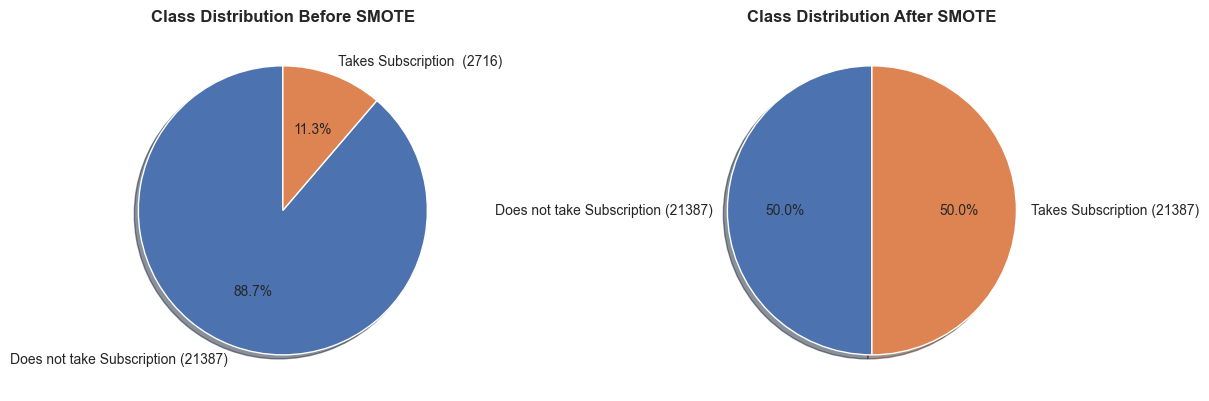

In [129]:
# Calculate the class proportions
original_counts = y_train.value_counts()
smote_counts = y_train_resampled.value_counts()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for original data
labels_original = [f"Does not take Subscription ({original_counts[0]})", f"Takes Subscription  ({original_counts[1]})"]
axs[0].pie(original_counts, labels=labels_original, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 10, 'fontname': 'Arial'})
axs[0].set_title("Class Distribution Before SMOTE", fontsize=12, fontweight='bold', fontname='Arial')

# Pie chart for SMOTE data
labels_smote = [f"Does not take Subscription ({smote_counts[0]})", f"Takes Subscription ({smote_counts[1]})"]
axs[1].pie(smote_counts, labels=labels_smote, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 10, 'fontname': 'Arial'})
axs[1].set_title("Class Distribution After SMOTE", fontsize=12, fontweight='bold', fontname='Arial')

plt.tight_layout()
plt.show()

### **Evaluating the Baseline Model**

In [57]:
y_central = y.mode()
y_val_central = y_val.mode()
y_test_central = y_test.mode()

In [58]:
y_base = np.full(y.shape, y_central)
y_val_base = np.full(y_val.shape, y_val_central)
y_test_base = np.full(y_test.shape, y_test_central)

In [59]:
from sklearn.metrics import accuracy_score

train_perf = accuracy_score(y, y_base)
valid_perf = accuracy_score(y_val, y_val_base)
test_perf = accuracy_score(y_test, y_test_base)

print("Training performance: ", train_perf)
print("\nValidation performance: ", valid_perf)
print("\nTesting performance: ", test_perf)

Training performance:  0.8872874816418987

Validation performance:  0.8872433105164903

Testing performance:  0.8872433105164903


## **Selection of Parametric & Non-Parametric Models**

In this project, I have chosen a combination of parametric and non-parametric models to leverage the strengths of different modeling techniques and ensure a comprehensive analysis. The selection of models includes Logistic Regression as a parametric model, and Random Forest Classifier and K-Nearest Neighbors (KNN) as non-parametric models.

### **Parametric Model: Train the Logistic Regression Model**

In [60]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_model = LogisticRegression()

In [61]:
# Train the model on the training data
logistic_model.fit(X_train_resampled, y_train_resampled)

C:\Users\paras\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Predict on the validation set
logistic_y_val_pred = logistic_model.predict(X_val)

# Get predicted probabilities for class 1 (positive class)
logistic_y_val_prob = logistic_model.predict_proba(X_val)[:, 1]

# Evaluate the model
logistic_accuracy = accuracy_score(y_val, logistic_y_val_pred)
logistic_precision = precision_score(y_val, logistic_y_val_pred)
logistic_recall = recall_score(y_val, logistic_y_val_pred)
logistic_f1 = f1_score(y_val, logistic_y_val_pred)
logistic_roc_auc = roc_auc_score(y_val, logistic_y_val_prob)

# Print metrics
print("Logistic Regression - Validation Set Metrics:")
print(f"Accuracy: {logistic_accuracy:.4f}")
print(f"Precision: {logistic_precision:.4f}")
print(f"Recall: {logistic_recall:.4f}")
print(f"F1 Score: {logistic_f1:.4f}")
print(f"ROC AUC Score: {logistic_roc_auc:.4f}")

Logistic Regression - Validation Set Metrics:
Accuracy: 0.8584
Precision: 0.4365
Recall: 0.8797
F1 Score: 0.5835
ROC AUC Score: 0.9333


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Predict on the test set
logistic_y_test_pred = logistic_model.predict(X_test)

# Get predicted probabilities for class 1 (positive class)
logistic_y_test_prob = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the model
logistic_test_accuracy = accuracy_score(y_test, logistic_y_test_pred)
logistic_test_precision = precision_score(y_test, logistic_y_test_pred)
logistic_test_recall = recall_score(y_test, logistic_y_test_pred)
logistic_test_f1 = f1_score(y_test, logistic_y_test_pred)
logistic_test_roc_auc = roc_auc_score(y_test, logistic_y_test_prob)

# Print metrics
print("Logistic Regression - Test Set Metrics:")
print(f"Accuracy: {logistic_test_accuracy:.4f}")
print(f"Precision: {logistic_test_precision:.4f}")
print(f"Recall: {logistic_test_recall:.4f}")
print(f"F1 Score: {logistic_test_f1:.4f}")
print(f"ROC AUC Score: {logistic_test_roc_auc:.4f}")

Logistic Regression - Test Set Metrics:
Accuracy: 0.8614
Precision: 0.4431
Recall: 0.8940
F1 Score: 0.5925
ROC AUC Score: 0.9418


In [64]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [92]:
from skopt import BayesSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Define the logistic regression model
logistic_model = LogisticRegression()

# Define the hyperparameter space for Bayesian optimization
param_space = {
    'C': (0.001, 100.0, 'log-uniform'),  # Regularization parameter
    'penalty': ['l2']  # Penalty term
}

# Use Bayesian optimization to find the optimal hyperparameters
opt = BayesSearchCV(estimator=logistic_model, search_spaces=param_space, n_iter=50, cv=5)
opt.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = opt.best_params_

print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Hyperparameters:
C: 1.4674791505316616
penalty: l2


In [135]:
# Train the Logistic Regression model with the best hyperparameters
logistic_model_best = LogisticRegression(**best_params)
logistic_model_best.fit(X_train_resampled, y_train_resampled)

# Perform cross-validation on the resampled data
cv_scores_log = cross_val_score(logistic_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print("\nCross-Validation Scores (Logistic Regression):", cv_scores_log)
print("Mean CV Score (Logistic Regression):", cv_scores_log.mean())

TypeError: LogisticRegression.__init__() got an unexpected keyword argument 'metric'

In [136]:
# Perform cross-validation on the resampled data
cv_scores_log = cross_val_score(logistic_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print("\nCross-Validation Scores (Logistic Regression):", cv_scores_log)
print("Mean CV Score (Logistic Regression):", cv_scores_log.mean())


Cross-Validation Scores (Logistic Regression): [0.87562829 0.87095266 0.8704851  0.87481005 0.86965162]
Mean CV Score (Logistic Regression): 0.8723055441642307


In [67]:
# Initialize dictionaries to store metrics
validation_metrics = {}
test_metrics = {}

# Evaluate the model on validation set
y_val_pred = logistic_model_best.predict(X_val)
y_val_prob = logistic_model_best.predict_proba(X_val)[:, 1]

validation_metrics['logistic_regression'] = {
    'accuracy': accuracy_score(y_val, y_val_pred),
    'precision': precision_score(y_val, y_val_pred),
    'recall': recall_score(y_val, y_val_pred),
    'f1_score': f1_score(y_val, y_val_pred),
    'roc_auc': roc_auc_score(y_val, y_val_prob)
}

print("\nValidation Set Metrics for Logistic Regression (After Hyperparameter Tuning- Bayesian Estimation):")
for metric, value in validation_metrics['logistic_regression'].items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Evaluate the model on test set
y_test_pred = logistic_model_best.predict(X_test)
y_test_prob = logistic_model_best.predict_proba(X_test)[:, 1]

test_metrics['logistic_regression'] = {
    'accuracy': accuracy_score(y_test, y_test_pred),
    'precision': precision_score(y_test, y_test_pred),
    'recall': recall_score(y_test, y_test_pred),
    'f1_score': f1_score(y_test, y_test_pred),
    'roc_auc': roc_auc_score(y_test, y_test_prob)
}

print("\nTest Set Metrics for Logistic Regression (After Hyperparameter Tuning- Bayesian Estimation):")
for metric, value in test_metrics['logistic_regression'].items():
    print(f"{metric.capitalize()}: {value:.4f}")


Validation Set Metrics for Logistic Regression (After Hyperparameter Tuning- Bayesian Estimation):
Accuracy: 0.8584
Precision: 0.4365
Recall: 0.8808
F1_score: 0.5838
Roc_auc: 0.9333

Test Set Metrics for Logistic Regression (After Hyperparameter Tuning- Bayesian Estimation):
Accuracy: 0.8612
Precision: 0.4429
Recall: 0.8940
F1_score: 0.5923
Roc_auc: 0.9418


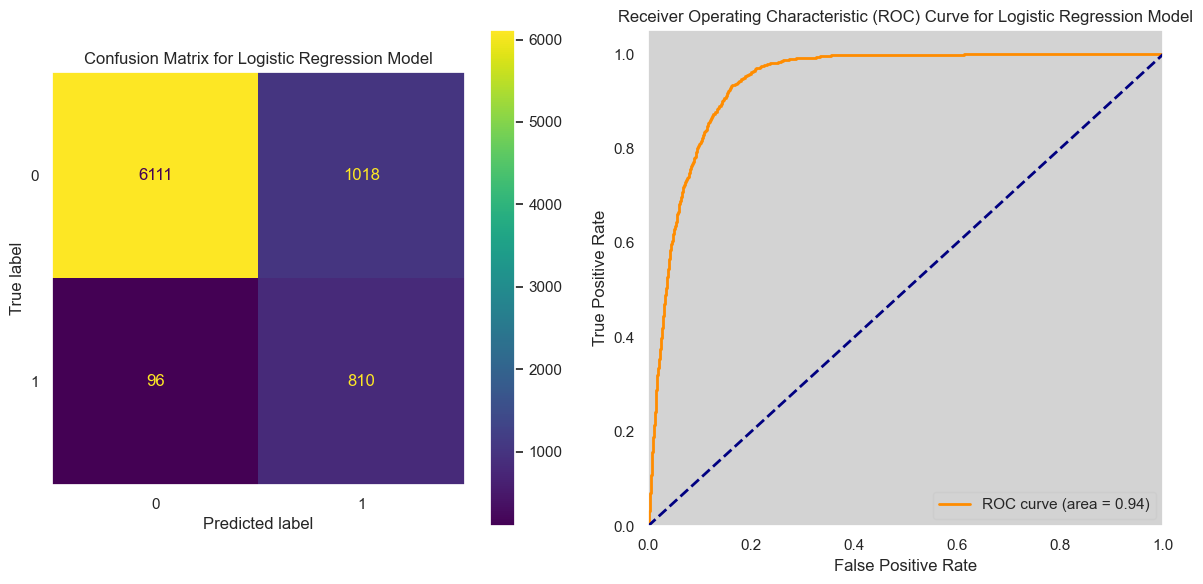

In [143]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, logistic_y_test_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_y_test_prob)
roc_auc = auc(fpr, tpr)

# Plot confusion matrix and ROC curve side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='viridis', ax=ax1)  # Changed colormap to 'viridis'
ax1.set_title('Confusion Matrix for Logistic Regression Model')
ax1.grid(False)  # Remove grid lines

# Plot ROC curve
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression Model')
ax2.legend(loc='lower right')
ax2.grid(False)  # Remove grid lines

plt.tight_layout()
plt.show()

### **Non-Parametric Model: Training K-Nearest Neighbour Model**

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create KNN model
knn_model = KNeighborsClassifier()

In [69]:
# Fit the model on training data
knn_model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [70]:
# Predict on validation set
y_val_pred = knn_model.predict(X_val)

# Calculate evaluation metrics for validation set
knn_val_accuracy = accuracy_score(y_val, y_val_pred)
knn_val_precision = precision_score(y_val, y_val_pred)
knn_val_recall = recall_score(y_val, y_val_pred)
knn_val_f1 = f1_score(y_val, y_val_pred)
knn_val_roc_auc = roc_auc_score(y_val, y_val_pred)

print("Validation Set Metrics:")
print(f"Accuracy: {knn_val_accuracy:.4f}")
print(f"Precision: {knn_val_precision:.4f}")
print(f"Recall: {knn_val_recall:.4f}")
print(f"F1-score: {knn_val_f1:.4f}")
print(f"ROC AUC score: {knn_val_roc_auc:.4f}")

Validation Set Metrics:
Accuracy: 0.8565
Precision: 0.4229
Recall: 0.7472
F1-score: 0.5401
ROC AUC score: 0.8088


In [71]:
# Predict on test set
y_test_pred = knn_model.predict(X_test)

# Calculate evaluation metrics for test set
knn_test_accuracy = accuracy_score(y_test, y_test_pred)
knn_test_precision = precision_score(y_test, y_test_pred)
knn_test_recall = recall_score(y_test, y_test_pred)
knn_test_f1 = f1_score(y_test, y_test_pred)
knn_test_roc_auc = roc_auc_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f"Accuracy: {knn_test_accuracy:.4f}")
print(f"Precision: {knn_test_precision:.4f}")
print(f"Recall: {knn_test_recall:.4f}")
print(f"F1-score: {knn_test_f1:.4f}")
print(f"ROC AUC score: {knn_test_roc_auc:.4f}")


Test Set Metrics:
Accuracy: 0.8572
Precision: 0.4248
Recall: 0.7517
F1-score: 0.5428
ROC AUC score: 0.8112


In [94]:
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Suppress specific UserWarnings from skopt
warnings.filterwarnings("ignore", message="The objective has been evaluated at")

# Define the hyperparameter space for Bayesian optimization
param_space = {
    'n_neighbors': (1, 50),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Use Bayesian optimization to find the optimal hyperparameters
opt = BayesSearchCV(estimator=knn_model, search_spaces=param_space, n_iter=50, cv=5, n_jobs=-1)
opt.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = opt.best_params_

print("Best Hyperparameters for K-Nearest Neighbour Model (Bayesian Estimation Method):")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Hyperparameters for K-Nearest Neighbour Model (Bayesian Estimation Method):
metric: manhattan
n_neighbors: 1
weights: distance


In [131]:
# Train the KNN model with the best hyperparameters
knn_model_best = KNeighborsClassifier(**best_params)
knn_model_best.fit(X_train_resampled, y_train_resampled)

# Perform cross-validation on the resampled data
cv_scores_knn = cross_val_score(knn_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print("\nCross-Validation Scores (KNN):", cv_scores_knn)
print("Mean CV Score (KNN):", cv_scores_knn.mean())


Cross-Validation Scores (KNN): [0.92729398 0.92121566 0.92437171 0.9220339  0.92985738]
Mean CV Score (KNN): 0.924954526180635


In [74]:
# Initialize dictionaries to store metrics
knn_validation_metrics = {}
knn_test_metrics = {}

# Evaluate the KNN model on validation set
knn_y_val_pred = knn_model_best.predict(X_val)
knn_y_val_prob = knn_model_best.predict_proba(X_val)[:, 1]

knn_validation_metrics = {
    'accuracy': accuracy_score(y_val, knn_y_val_pred),
    'precision': precision_score(y_val, knn_y_val_pred),
    'recall': recall_score(y_val, knn_y_val_pred),
    'f1_score': f1_score(y_val, knn_y_val_pred),
    'roc_auc': roc_auc_score(y_val, knn_y_val_prob)
}

print("\nValidation Set Metrics for KNN (After Hyperparameter Tuning - Bayesian Estimation):")
for metric, value in knn_validation_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Evaluate the KNN model on test set
knn_y_test_pred = knn_model_best.predict(X_test)
knn_y_test_prob = knn_model_best.predict_proba(X_test)[:, 1]

knn_test_metrics = {
    'accuracy': accuracy_score(y_test, knn_y_test_pred),
    'precision': precision_score(y_test, knn_y_test_pred),
    'recall': recall_score(y_test, knn_y_test_pred),
    'f1_score': f1_score(y_test, knn_y_test_pred),
    'roc_auc': roc_auc_score(y_test, knn_y_test_prob)
}

print("\nTest Set Metrics for KNN (After Hyperparameter Tuning - Bayesian Estimation):")
for metric, value in knn_test_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")


Validation Set Metrics for KNN (After Hyperparameter Tuning - Bayesian Estimation):
Accuracy: 0.8828
Precision: 0.4783
Recall: 0.4371
F1_score: 0.4567
Roc_auc: 0.6882

Test Set Metrics for KNN (After Hyperparameter Tuning - Bayesian Estimation):
Accuracy: 0.8840
Precision: 0.4834
Recall: 0.4183
F1_score: 0.4485
Roc_auc: 0.6808


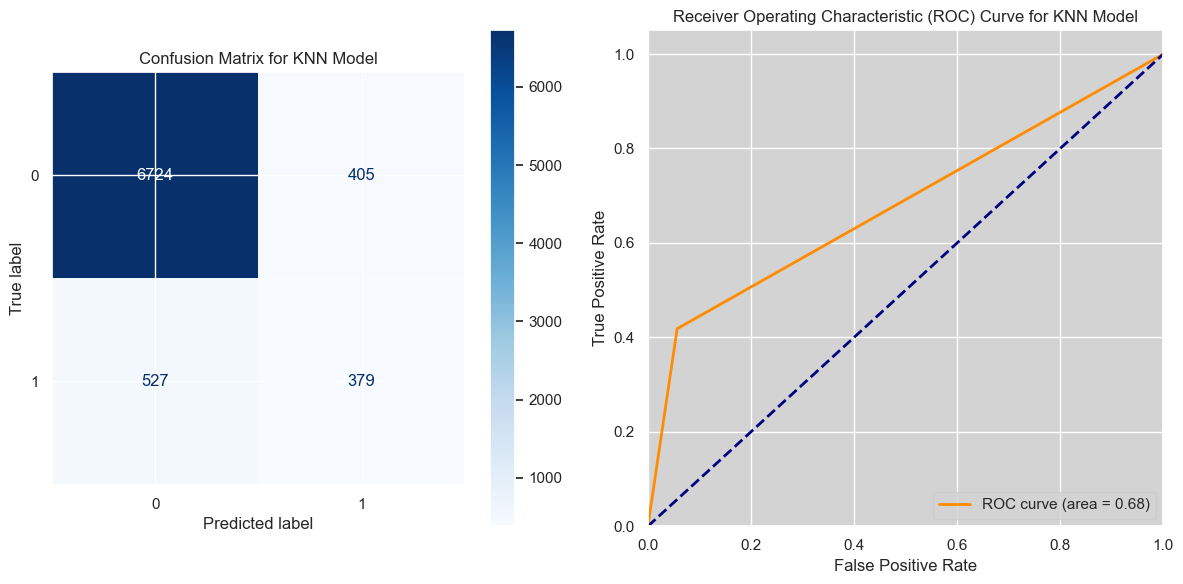

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, knn_y_test_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, knn_y_test_prob)
roc_auc = auc(fpr, tpr)

# Plot confusion matrix and ROC curve side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix for KNN Model')

# Plot ROC curve
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (ROC) Curve for KNN Model')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

### **Non-Parametric Model: Training Support Vector Machine Model**

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create SVM model
svm_model = SVC()

In [76]:
# Train the SVM model
svm_model.fit(X_train_resampled, y_train_resampled)

SVC()

In [77]:
# Predict on validation set
y_val_pred_svm = svm_model.predict(X_val)

# Calculate evaluation metrics for validation set
svm_val_accuracy = accuracy_score(y_val, y_val_pred_svm)
svm_val_precision = precision_score(y_val, y_val_pred_svm)
svm_val_recall = recall_score(y_val, y_val_pred_svm)
svm_val_f1 = f1_score(y_val, y_val_pred_svm)
# If you have binary classification:
svm_val_roc_auc = roc_auc_score(y_val, y_val_pred_svm)

print("Validation Set Metrics:")
print(f"Accuracy: {svm_val_accuracy:.4f}")
print(f"Precision: {svm_val_precision:.4f}")
print(f"Recall: {svm_val_recall:.4f}")
print(f"F1-score: {svm_val_f1:.4f}")
# If you have binary classification:
print(f"ROC AUC score: {svm_val_roc_auc:.4f}")

Validation Set Metrics:
Accuracy: 0.8473
Precision: 0.4182
Recall: 0.9062
F1-score: 0.5723
ROC AUC score: 0.8730


In [78]:
# Predict on test set
y_test_pred_svm = svm_model.predict(X_test)

# Calculate evaluation metrics for test set
svm_test_accuracy = accuracy_score(y_test, y_test_pred_svm)
svm_test_precision = precision_score(y_test, y_test_pred_svm)
svm_test_recall = recall_score(y_test, y_test_pred_svm)
svm_test_f1 = f1_score(y_test, y_test_pred_svm)
# If you have binary classification:
svm_test_roc_auc = roc_auc_score(y_test, y_test_pred_svm)

print("Test Set Metrics:")
print(f"Accuracy: {svm_test_accuracy:.4f}")
print(f"Precision: {svm_test_precision:.4f}")
print(f"Recall: {svm_test_recall:.4f}")
print(f"F1-score: {svm_test_f1:.4f}")
# If you have binary classification:
print(f"ROC AUC score: {svm_test_roc_auc:.4f}")

Test Set Metrics:
Accuracy: 0.8555
Precision: 0.4337
Recall: 0.9205
F1-score: 0.5896
ROC AUC score: 0.8839


In [79]:
from skopt import BayesSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings

# Suppress specific UserWarnings from skopt
warnings.filterwarnings("ignore", message="The objective has been evaluated at")

# Define a more restricted hyperparameter space for Bayesian optimization
param_space = {
    'C': (1e-2, 1e+2, 'log-uniform'),  # More restricted range for Regularization parameter
    'kernel': ['linear', 'rbf'],  # Simplified kernel options
    'gamma': (1e-4, 1e-1, 'log-uniform')  # More restricted range for Kernel coefficient
}

# Create SVM model
svm_model = SVC()

# Use Bayesian optimization to find the optimal hyperparameters
opt = BayesSearchCV(estimator=svm_model, search_spaces=param_space, n_iter=20, cv=3, n_jobs=-1, verbose=0)
opt.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = opt.best_params_

print("Best Hyperparameters for SVM Model (Bayesian Estimation Method):")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Hyperparameters for SVM Model (Bayesian Estimation Method):
C: 99.37621692743038
gamma: 0.09678307005894808
kernel: rbf


In [132]:
# Train the SVM model with the best hyperparameters
svm_model_best = SVC(**best_params)
svm_model_best.fit(X_train_resampled, y_train_resampled)

# Perform cross-validation on the resampled data
cv_scores = cross_val_score(svm_model_best, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

TypeError: SVC.__init__() got an unexpected keyword argument 'metric'

In [139]:
# Perform cross-validation on the resampled data
svm_cv_scores = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print("\nCross-Validation Scores:", svm_cv_scores)
print("Mean CV Score:", svm_cv_scores.mean())


Cross-Validation Scores: [0.90227937 0.89772063 0.89456458 0.89783752 0.89747487]
Mean CV Score: 0.8979753939185402


In [81]:
# Initialize dictionaries to store metrics
svm_validation_metrics = {}
svm_test_metrics = {}

# Train the SVM model with the best hyperparameters
svm_model_best = SVC(**best_params, probability=True)
svm_model_best.fit(X_train_resampled, y_train_resampled)

# Evaluate the SVM model on validation set
svm_y_val_pred = svm_model_best.predict(X_val)
svm_y_val_prob = svm_model_best.predict_proba(X_val)[:, 1]

svm_validation_metrics = {
    'accuracy': accuracy_score(y_val, svm_y_val_pred),
    'precision': precision_score(y_val, svm_y_val_pred),
    'recall': recall_score(y_val, svm_y_val_pred),
    'f1_score': f1_score(y_val, svm_y_val_pred),
    'roc_auc': roc_auc_score(y_val, svm_y_val_prob)
}

print("\nValidation Set Metrics for SVM (After Hyperparameter Tuning - Bayesian Estimation):")
for metric, value in svm_validation_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Evaluate the SVM model on test set
svm_y_test_pred = svm_model_best.predict(X_test)
svm_y_test_prob = svm_model_best.predict_proba(X_test)[:, 1]

svm_test_metrics = {
    'accuracy': accuracy_score(y_test, svm_y_test_pred),
    'precision': precision_score(y_test, svm_y_test_pred),
    'recall': recall_score(y_test, svm_y_test_pred),
    'f1_score': f1_score(y_test, svm_y_test_pred),
    'roc_auc': roc_auc_score(y_test, svm_y_test_prob)
}

print("\nTest Set Metrics for SVM (After Hyperparameter Tuning - Bayesian Estimation):")
for metric, value in svm_test_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")


Validation Set Metrics for SVM (After Hyperparameter Tuning - Bayesian Estimation):
Accuracy: 0.8856
Precision: 0.4936
Recall: 0.5574
F1_score: 0.5236
Roc_auc: 0.9041

Test Set Metrics for SVM (After Hyperparameter Tuning - Bayesian Estimation):
Accuracy: 0.8871
Precision: 0.4995
Recall: 0.5044
F1_score: 0.5019
Roc_auc: 0.8986


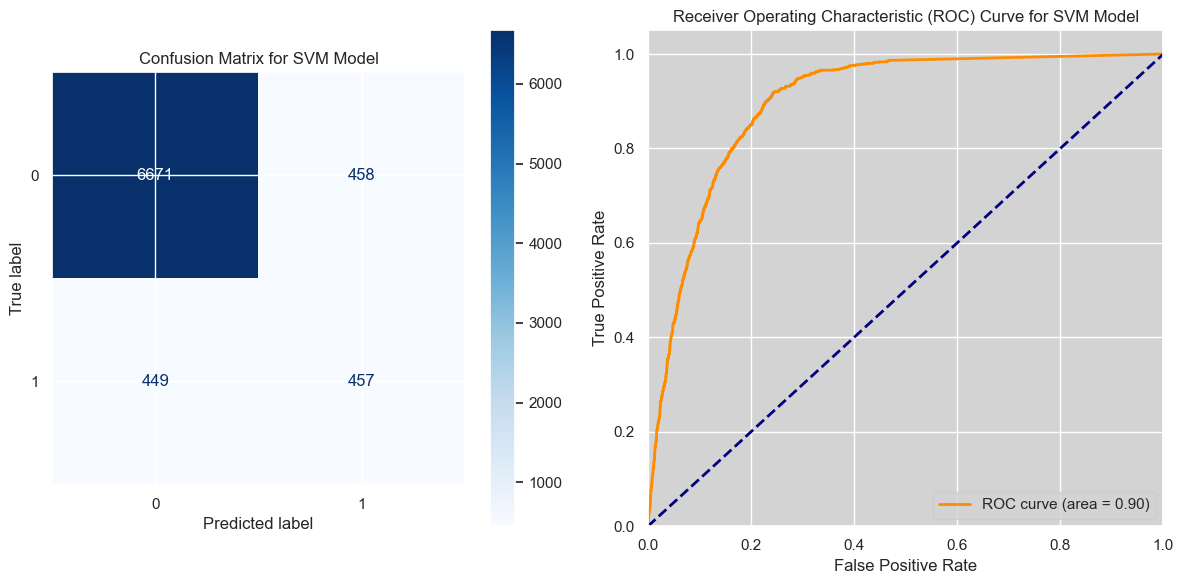

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

# Generate confusion matrix
svm_cm = confusion_matrix(y_test, svm_y_test_pred)

# Generate ROC curve
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_test_prob)
svm_roc_auc = auc(svm_fpr, svm_tpr)

# Plot confusion matrix and ROC curve side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=svm_cm).plot(cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix for SVM Model')

# Plot ROC curve
ax2.plot(svm_fpr, svm_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {svm_roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (ROC) Curve for SVM Model')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [88]:
# Store the SVM metrics in a dictionary
svm_test_metrics = {
    'accuracy': svm_test_accuracy,
    'precision': svm_test_precision,
    'recall': svm_test_recall,
    'f1_score': svm_test_f1,
    'roc_auc': svm_test_roc_auc
}

### **Parametric Model: Training a Naive Bayes Model**

In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create Gaussian Naive Bayes model
nb_model = GaussianNB()

In [101]:
# Train the model
nb_model.fit(X_train_resampled, y_train_resampled)  # Replace X_train and y_train with your training data

GaussianNB()

In [130]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
cv_scores_nb = cross_val_score(nb_model, X_train_resampled, y_train_resampled, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores_nb)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV accuracy:", cv_scores_nb.mean())
print("Standard deviation of CV accuracy:", cv_scores_nb.std())

Cross-validation scores: [0.71794272 0.70263004 0.71478667 0.71011105 0.71826046]
Mean CV accuracy: 0.7127461896075498
Standard deviation of CV accuracy: 0.005845600041802302


In [102]:
# Predict on validation set
y_val_pred_nb = nb_model.predict(X_val)

# Calculate evaluation metrics for validation set
nb_val_accuracy = accuracy_score(y_val, y_val_pred_nb)
nb_val_precision = precision_score(y_val, y_val_pred_nb)
nb_val_recall = recall_score(y_val, y_val_pred_nb)
nb_val_f1 = f1_score(y_val, y_val_pred_nb)

# Calculate ROC AUC score using predicted probabilities
y_val_pred_prob_nb = nb_model.predict_proba(X_val)[:, 1]  # For binary classification
nb_val_roc_auc = roc_auc_score(y_val, y_val_pred_prob_nb)

print("Validation Set Metrics:")
print(f"Accuracy: {nb_val_accuracy:.4f}")
print(f"Precision: {nb_val_precision:.4f}")
print(f"Recall: {nb_val_recall:.4f}")
print(f"F1-score: {nb_val_f1:.4f}")
print(f"ROC AUC score: {nb_val_roc_auc:.4f}")

Validation Set Metrics:
Accuracy: 0.8576
Precision: 0.4036
Recall: 0.5497
F1-score: 0.4654
ROC AUC score: 0.8310


In [103]:
# Predict on the test set
y_test_pred_nb = nb_model.predict(X_test)

# Calculate evaluation metrics for test set
nb_test_accuracy = accuracy_score(y_test, y_test_pred_nb)
nb_test_precision = precision_score(y_test, y_test_pred_nb)
nb_test_recall = recall_score(y_test, y_test_pred_nb)
nb_test_f1 = f1_score(y_test, y_test_pred_nb)

# Calculate ROC AUC score using predicted probabilities
y_test_pred_prob_nb = nb_model.predict_proba(X_test)[:, 1]  # For binary classification
nb_test_roc_auc = roc_auc_score(y_test, y_test_pred_prob_nb)

print("Test Set Metrics:")
print(f"Accuracy: {nb_test_accuracy:.4f}")
print(f"Precision: {nb_test_precision:.4f}")
print(f"Recall: {nb_test_recall:.4f}")
print(f"F1-score: {nb_test_f1:.4f}")
print(f"ROC AUC score: {nb_test_roc_auc:.4f}")

Test Set Metrics:
Accuracy: 0.8566
Precision: 0.4016
Recall: 0.5541
F1-score: 0.4657
ROC AUC score: 0.8442


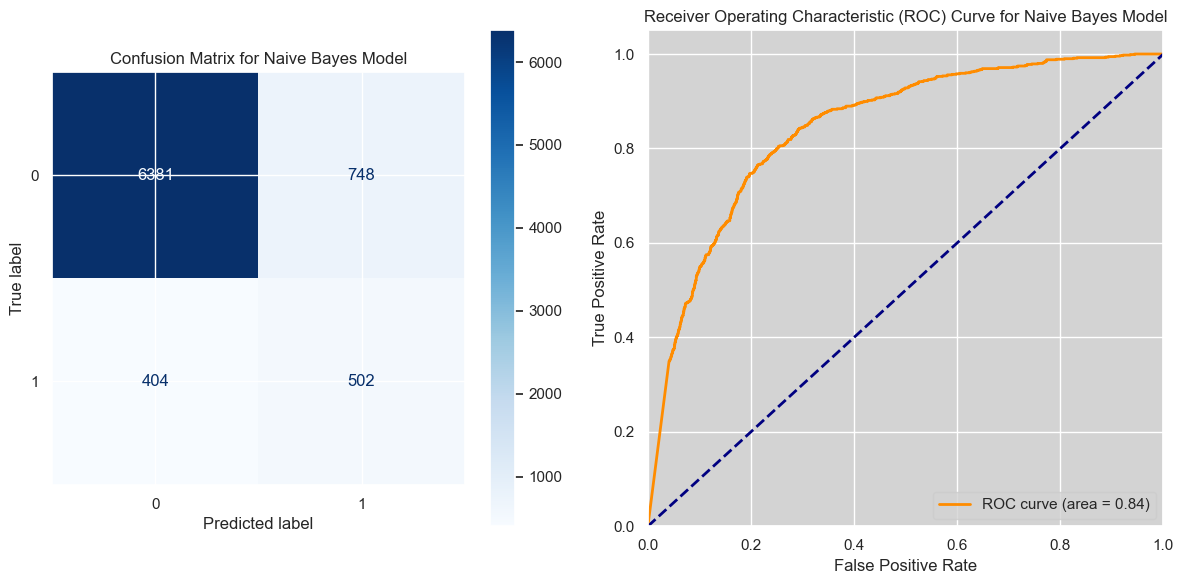

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

# Generate confusion matrix
nb_cm = confusion_matrix(y_test, y_test_pred_nb)

# Generate ROC curve
nb_fpr, nb_tpr, _ = roc_curve(y_test, y_test_pred_prob_nb)
nb_roc_auc = auc(nb_fpr, nb_tpr)

# Plot confusion matrix and ROC curve side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=nb_cm).plot(cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix for Naive Bayes Model')

# Plot ROC curve
ax2.plot(nb_fpr, nb_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {nb_roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes Model')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [104]:
# Perform cross-validation
cv_scores_nb = cross_val_score(nb_model, X_train_resampled, y_train_resampled, cv=5)  # Adjust cv as needed

# Calculate mean accuracy
mean_accuracy_nb = cv_scores_nb.mean()

print("Cross-Validation Accuracy:", mean_accuracy_nb)

Cross-Validation Accuracy: 0.7127461896075498


In [89]:
# Extracting the metrics for each model from the dictionaries
logistic_metrics = {
    'Recall': test_metrics['logistic_regression']['recall'],
    'F1': test_metrics['logistic_regression']['f1_score'],
    'Precision': test_metrics['logistic_regression']['precision']
}

knn_metrics = {
    'Recall': knn_test_metrics['recall'],
    'F1': knn_test_metrics['f1_score'],
    'Precision': knn_test_metrics['precision']
}

svm_metrics = {
    'Recall': svm_test_metrics['recall'],
    'F1': svm_test_metrics['f1_score'],
    'Precision': svm_test_metrics['precision']
}

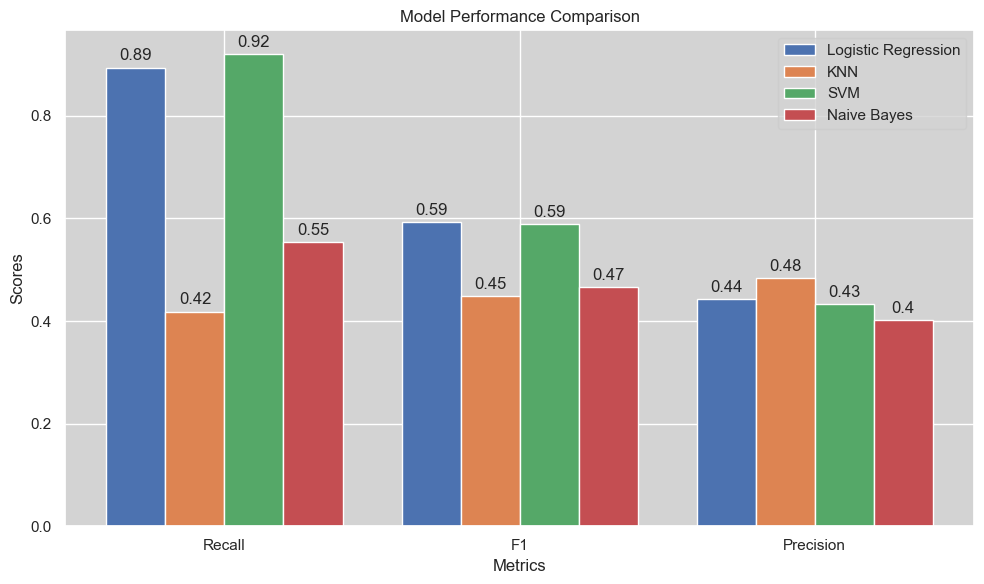

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and metrics
models = ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes']
metrics = ['Recall', 'F1', 'Precision']

# Collect metrics for each model
logistic_values = [logistic_metrics['Recall'], logistic_metrics['F1'], logistic_metrics['Precision']]
knn_values = [knn_metrics['Recall'], knn_metrics['F1'], knn_metrics['Precision']]
svm_values = [svm_metrics['Recall'], svm_metrics['F1'], svm_metrics['Precision']]

# Assuming Naive Bayes metrics are not available, you can set them to some default values or None
naive_bayes_values = [nb_test_recall,nb_test_f1, nb_test_precision]

# Convert to numpy arrays for easier plotting
logistic_values = np.array(logistic_values)
knn_values = np.array(knn_values)
svm_values = np.array(svm_values)
naive_bayes_values = np.array(naive_bayes_values)

# Plotting
x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - 1.5*width, logistic_values, width, label='Logistic Regression')
rects2 = ax.bar(x - 0.5*width, knn_values, width, label='KNN')
rects3 = ax.bar(x + 0.5*width, svm_values, width, label='SVM')
rects4 = ax.bar(x + 1.5*width, naive_bayes_values, width, label='Naive Bayes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add labels on bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        if rect.get_height() is not None:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

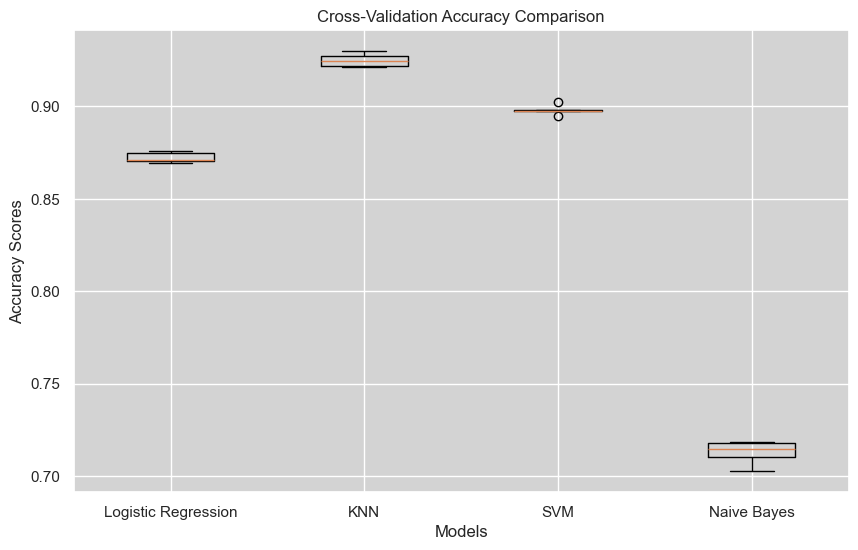

In [140]:
import matplotlib.pyplot as plt

# Cross-validation accuracy scores
cv_scores_nb = cv_scores_nb  # Assuming you have calculated cv_scores_nb for Naive Bayes
cv_scores_knn = cv_scores_knn
cv_scores_log = cv_scores_log
cv_scores_svm = svm_cv_scores

cv_accuracy_scores = [cv_scores_log, cv_scores_knn, cv_scores_svm, cv_scores_nb]
models = ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes']

# Create box plot
plt.figure(figsize=(10, 6))
plt.boxplot(cv_accuracy_scores, labels=models)
plt.title('Cross-Validation Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.show()